# **Project Title : Seoul Bike Sharing Demand Prediction**

**Project Type - Supervised Machine Learning Regression**

**Contribution - Individual**

## **Problem Description**

### **Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.**

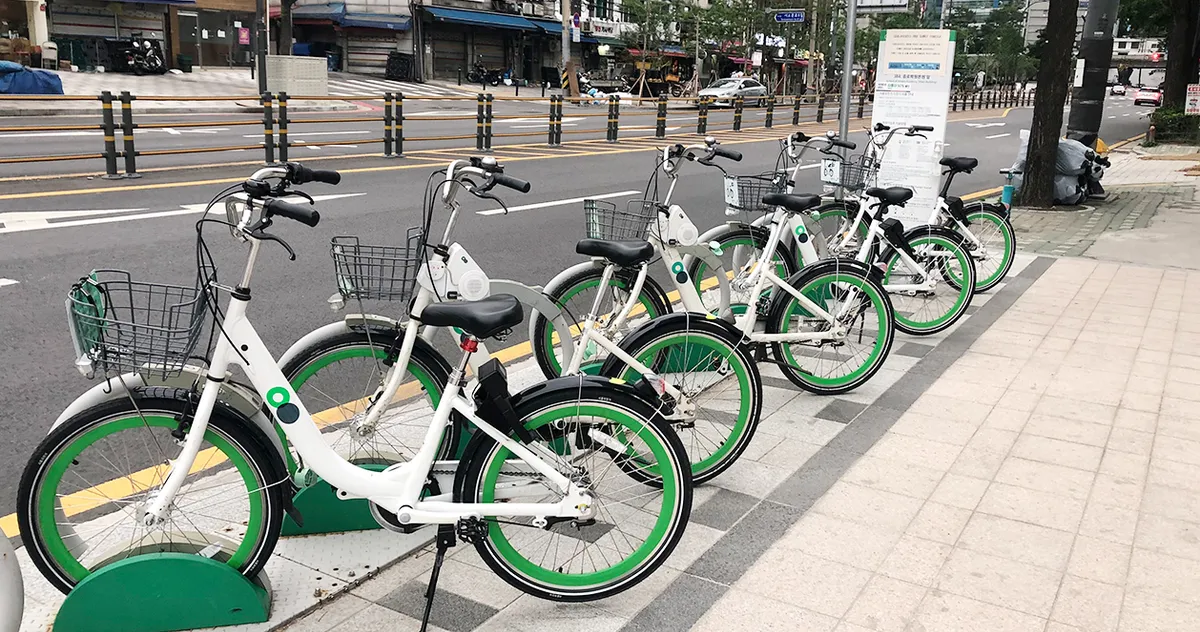

## **Data Description**

### **The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.**

### **Attribute Information:**

*   Date : year-month-day
*   Rented Bike count - Count of bikes rented at each *
*   Hour - Hour of he day
*   Temperature-Temperature in Celsius
*   Humidity - %
*   Windspeed - m/s
*   Visibility - 10m
*   Dew point temperature - Celsius
*   Solar radiation - MJ/m2
*   Rainfall - mm
*   Snowfall - cm
*   Seasons - Winter, Spring, Summer, Autumn
*   Holiday - Holiday/No holiday
*   Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)



In [103]:
#importing important libraries for data exploration,data visualization and machine learning algorithms
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.ticker as ticker
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import OneHotEncoder,StandardScaler,PolynomialFeatures,PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet,SGDRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# CSV file loaction path
path = '/content/drive/MyDrive/CSV files/dat-20230302T130046Z-001/other_csv/SeoulBikeData.csv'

In [3]:
#importing data
df = pd.read_csv(path, encoding= 'unicode_escape')

In [104]:
#checking first 5 rows
df.head()

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254     0             -5.2           37               2.2   
1                204     1             -5.5           38               0.8   
2                173     2             -6.0           39               1.0   
3                107     3             -6.2           40               0.9   
4                 78     4             -6.0           36               2.3   

   Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0              2000                      -17.6                      0.0   
1              2000                      -17.6                      0.0   
2              2000                      -17.7                      0.0   
3              2000                      -17.6                      0.0   
4              2000                      -18.6                      0.0   

   Rainfall(mm)  Snowfall (cm) Seasons     Holiday Functioning Day  Day  \
0           0.0            0.0  Winter  No Holiday             Yes   12   
1           0.0            0.0  Winter  No Holiday             Yes   12   
2           0.0            0.0  Winter  No Holiday             Yes   12   
3           0.0            0.0  Winter  No Holiday             Yes   12   
4           0.0            0.0  Winter  No Holiday             Yes   12   

   Day_Name  Month  Year  
0  Thursday      1  2017  
1  Thursday      1  2017  
2  Thursday      1  2017  
3  Thursday      1  2017  
4  Thursday      1  2017

In [5]:
#checking how many rows and columns in our dataset
df.shape

(8760, 14)

In [6]:
#checking columns
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [105]:
#dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
 13  Day                        8760 non-null   int64

In [106]:
#checking numerical columns
df.describe()

Rented Bike Count         Hour  Temperature(°C)  Humidity(%)  \
count        8760.000000  8760.000000      8760.000000  8760.000000   
mean          704.602055    11.500000        12.882922    58.226256   
std           644.997468     6.922582        11.944825    20.362413   
min             0.000000     0.000000       -17.800000     0.000000   
25%           191.000000     5.750000         3.500000    42.000000   
50%           504.500000    11.500000        13.700000    57.000000   
75%          1065.250000    17.250000        22.500000    74.000000   
max          3556.000000    23.000000        39.400000    98.000000   

       Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
count       8760.000000       8760.000000                8760.000000   
mean           1.724909       1436.825799                   4.073813   
std            1.036300        608.298712                  13.060369   
min            0.000000         27.000000                 -30.600000   
25%            0.900000        940.000000                  -4.700000   
50%            1.500000       1698.000000                   5.100000   
75%            2.300000       2000.000000                  14.800000   
max            7.400000       2000.000000                  27.200000   

       Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)          Day  \
count              8760.000000   8760.000000    8760.000000  8760.000000   
mean                  0.569111      0.148687       0.075068    15.720548   
std                   0.868746      1.128193       0.436746     8.796749   
min                   0.000000      0.000000       0.000000     1.000000   
25%                   0.000000      0.000000       0.000000     8.000000   
50%                   0.010000      0.000000       0.000000    16.000000   
75%                   0.930000      0.000000       0.000000    23.000000   
max                   3.520000     35.000000       8.800000    31.000000   

             Month         Year  
count  8760.000000  8760.000000  
mean      6.526027  2017.915068  
std       3.448048     0.278796  
min       1.000000  2017.000000  
25%       4.000000  2018.000000  
50%       7.000000  2018.000000  
75%      10.000000  2018.000000  
max      12.000000  2018.000000

In [9]:
#checking null values
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

observation : Our dataset has 8760 rows and 14 columns in which 4 columns are categorical and 10 columns are numerical.Our dataset hasn't any null values

### **Data Wrangling**

In [10]:
#converting date column datatype from object to datetime
df['Date'] = pd.to_datetime(df['Date'])

<ipython-input-10-a8c8a0af9651>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

In [12]:
#extracting day,month and year from date column
df['Day'] = df['Date'].dt.day
df['Day_Name'] = df['Date'].dt.day_name()
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df = df.drop(columns=['Date'])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
 13  Day                        8760 non-null   int64

In [107]:
df.head(2)

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254     0             -5.2           37               2.2   
1                204     1             -5.5           38               0.8   

   Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0              2000                      -17.6                      0.0   
1              2000                      -17.6                      0.0   

   Rainfall(mm)  Snowfall (cm) Seasons     Holiday Functioning Day  Day  \
0           0.0            0.0  Winter  No Holiday             Yes   12   
1           0.0            0.0  Winter  No Holiday             Yes   12   

   Day_Name  Month  Year  
0  Thursday      1  2017  
1  Thursday      1  2017

## **EDA**

<Axes: xlabel='Rented Bike Count', ylabel='Density'>

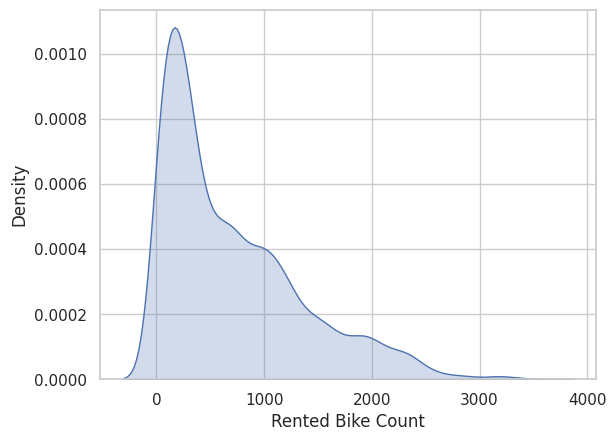

In [88]:
sns.set(style='whitegrid')  # Optional: Set the plot style
sns.kdeplot(df['Rented Bike Count'], fill=True, common_norm=False)

In [16]:
df['Year'].value_counts()

2018    8016
2017     744
Name: Year, dtype: int64

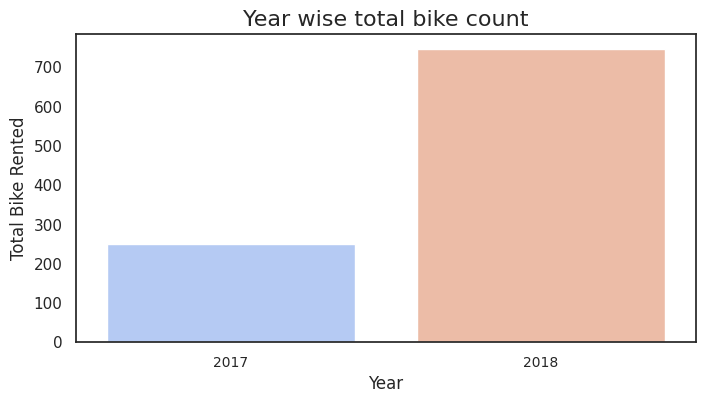

In [17]:
year_bike_count = df.groupby('Year')['Rented Bike Count'].mean().reset_index()
sns.set(style="white")
plt.figure(figsize=(8,4))
sns.barplot(x = 'Year',y='Rented Bike Count',palette="coolwarm",data=year_bike_count)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total Bike Rented", fontsize=12)
plt.title("Year wise total bike count", fontsize=16)
plt.xticks(fontsize=10, rotation=0)
formatter = ticker.ScalarFormatter(useMathText=False)
formatter.set_scientific(False)
ax = plt.gca()
ax.yaxis.set_major_formatter(formatter)
plt.show()

Observation : Bike count drastically increased in 2018

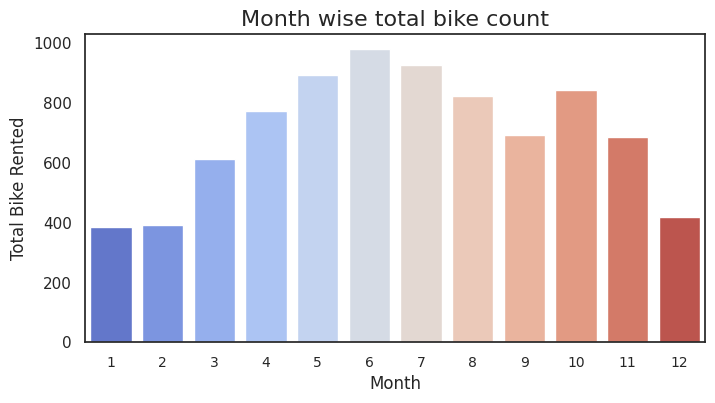

In [100]:
month_bike_count = df.groupby('Month')['Rented Bike Count'].mean().reset_index()
sns.set(style="white")
plt.figure(figsize=(8,4))
sns.barplot(x = 'Month',y='Rented Bike Count',palette="coolwarm",data=month_bike_count)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Bike Rented", fontsize=12)
plt.title("Month wise total bike count", fontsize=16)
plt.xticks(fontsize=10, rotation=0)
formatter = ticker.ScalarFormatter(useMathText=False)
formatter.set_scientific(False)
ax = plt.gca()
ax.yaxis.set_major_formatter(formatter)
plt.show()

from chart we can see that december,january and feb.has less bike rent count while may,june and july has more counts.In June,highest number of bikes are rented.


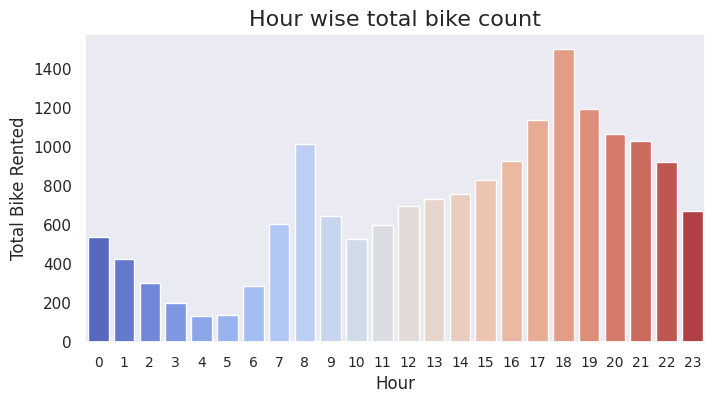

In [19]:
hour_bike_count = df.groupby('Hour')['Rented Bike Count'].mean().reset_index()
sns.set(style="dark")
plt.figure(figsize=(8,4))
sns.barplot(x = 'Hour',y='Rented Bike Count',palette="coolwarm",data=hour_bike_count)
plt.xlabel("Hour", fontsize=12)
plt.ylabel("Total Bike Rented", fontsize=12)
plt.title("Hour wise total bike count", fontsize=16)
plt.xticks(fontsize=10, rotation=0)
formatter = ticker.ScalarFormatter(useMathText=False)
formatter.set_scientific(False)
ax = plt.gca()
ax.yaxis.set_major_formatter(formatter)
plt.show()

Observation : From above graph we can see that from 6 a.m in morning,bike rent count starts to incearse and at 8 a.m more people rented bike and the reason for that may be they use bike to go to work.From 10 am to 6pm rent count gradually increases.At 6 pm highest number of people rent a bike.After 6 pm rent count decreases.

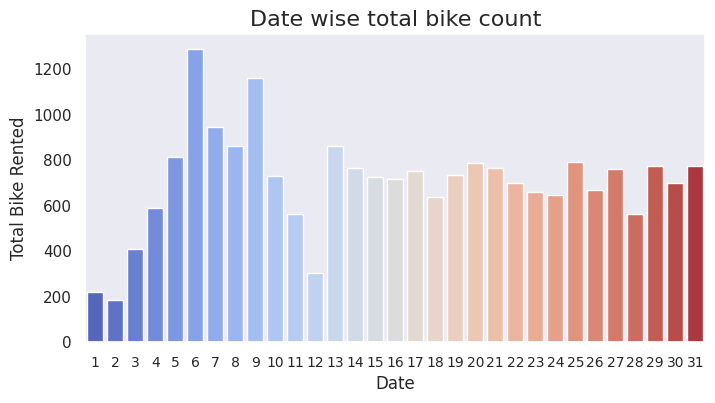

In [20]:
day_bike_count = df.groupby('Day')['Rented Bike Count'].mean().reset_index()
sns.set(style="dark")
plt.figure(figsize=(8,4))
sns.barplot(x = 'Day',y='Rented Bike Count',palette="coolwarm",data=day_bike_count)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Total Bike Rented", fontsize=12)
plt.title("Date wise total bike count", fontsize=16)
plt.xticks(fontsize=10, rotation=0)
formatter = ticker.ScalarFormatter(useMathText=False)
formatter.set_scientific(False)
ax = plt.gca()
ax.yaxis.set_major_formatter(formatter)
plt.show()

Observation : From above graph,day 1,2 and 12 has less number bike rented.So we can do maintenance of bike on these days.Day 6 has highest number of renting.

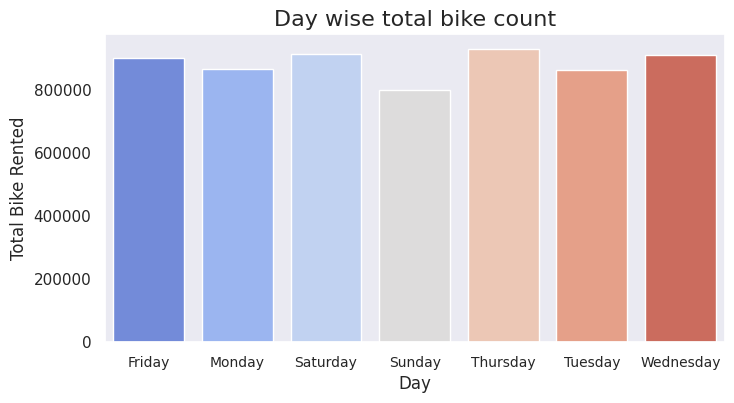

In [21]:
days_bike_count = df.groupby('Day_Name')['Rented Bike Count'].sum().reset_index()
sns.set(style="dark")
plt.figure(figsize=(8,4))
sns.barplot(x ='Day_Name',y='Rented Bike Count',palette="coolwarm",data=days_bike_count)
plt.xlabel("Day", fontsize=12)
plt.ylabel("Total Bike Rented", fontsize=12)
plt.title("Day wise total bike count", fontsize=16)
plt.xticks(fontsize=10, rotation=0)
formatter = ticker.ScalarFormatter(useMathText=False)
formatter.set_scientific(False)
ax = plt.gca()
ax.yaxis.set_major_formatter(formatter)
plt.show()

observation : on sunday less number of people rent bike.


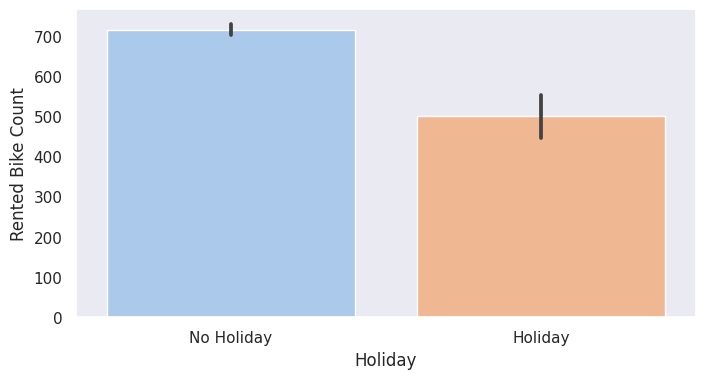

In [22]:
sns.set(style="dark")
plt.figure(figsize=(8,4))
sns.barplot(x='Holiday',y='Rented Bike Count', palette="pastel",data=df)
plt.show()


Observation : From graph we can seen that on holidays very less number of people rent bike.

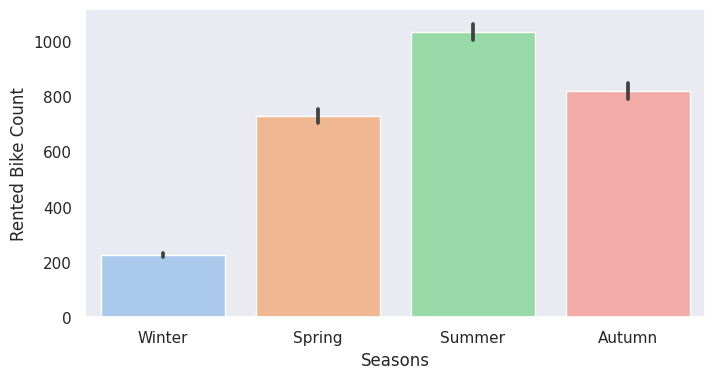

In [23]:
sns.set(style="dark")
plt.figure(figsize=(8,4))
sns.barplot(x='Seasons',y='Rented Bike Count', palette="pastel",data=df)
plt.show()

Observation : Generally people rent bike in Summer season following Autumn and Spring.Very less people rent bike in Winter.

## **skewness**

In [25]:
# separate numerical features from the dataframe
numeric_features= df.select_dtypes(exclude=['object','category'])
numeric_features.shape

(8760, 13)

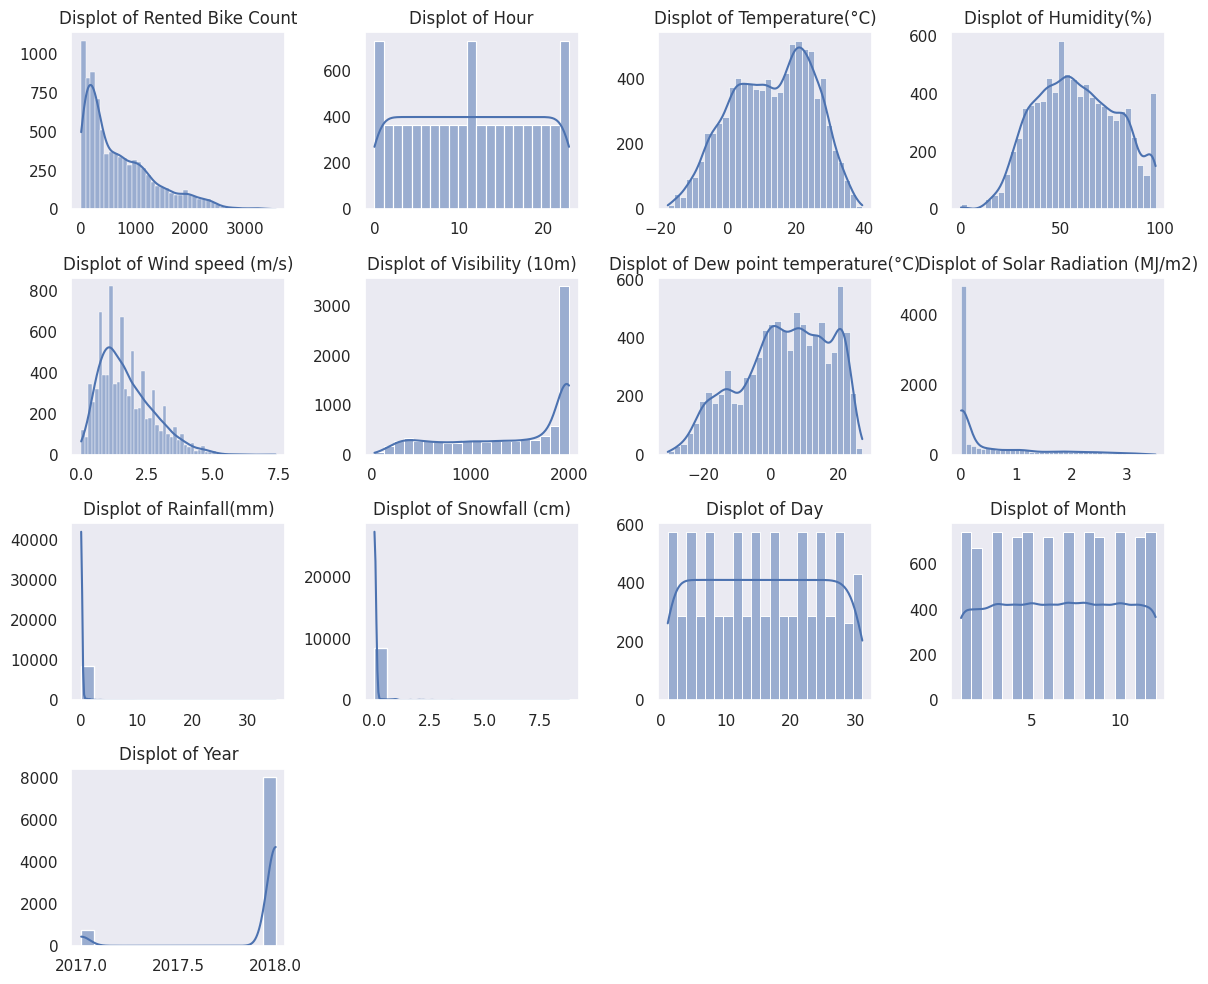

In [26]:
# printing displots to analyze the distribution of all numerical features
plt.figure(figsize=(12, 10))
for i, col in enumerate(numeric_features, 1):
    plt.subplot(4, 4, i)
    sns.histplot(numeric_features[col], kde=True)
    plt.title(f'Displot of {col}')
    plt.xlabel('')
    plt.ylabel('')
    plt.tight_layout()

plt.show()


In [27]:
df.skew().sort_values()

<ipython-input-27-7aed40c2ebf0>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew().sort_values()


Year                         -2.978262
Visibility (10m)             -0.701786
Dew point temperature(°C)    -0.367298
Temperature(°C)              -0.198326
Month                        -0.010458
Hour                          0.000000
Day                           0.007522
Humidity(%)                   0.059579
Wind speed (m/s)              0.890955
Rented Bike Count             1.153428
Solar Radiation (MJ/m2)       1.504040
Snowfall (cm)                 8.440801
Rainfall(mm)                 14.533232
dtype: float64

Observations : Year column has left skewed data while snowfall,rainfall,Rented Bike Count are right skewed distributed


<ipython-input-28-27af7c61080a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot = True,cmap='coolwarm')


<Axes: >

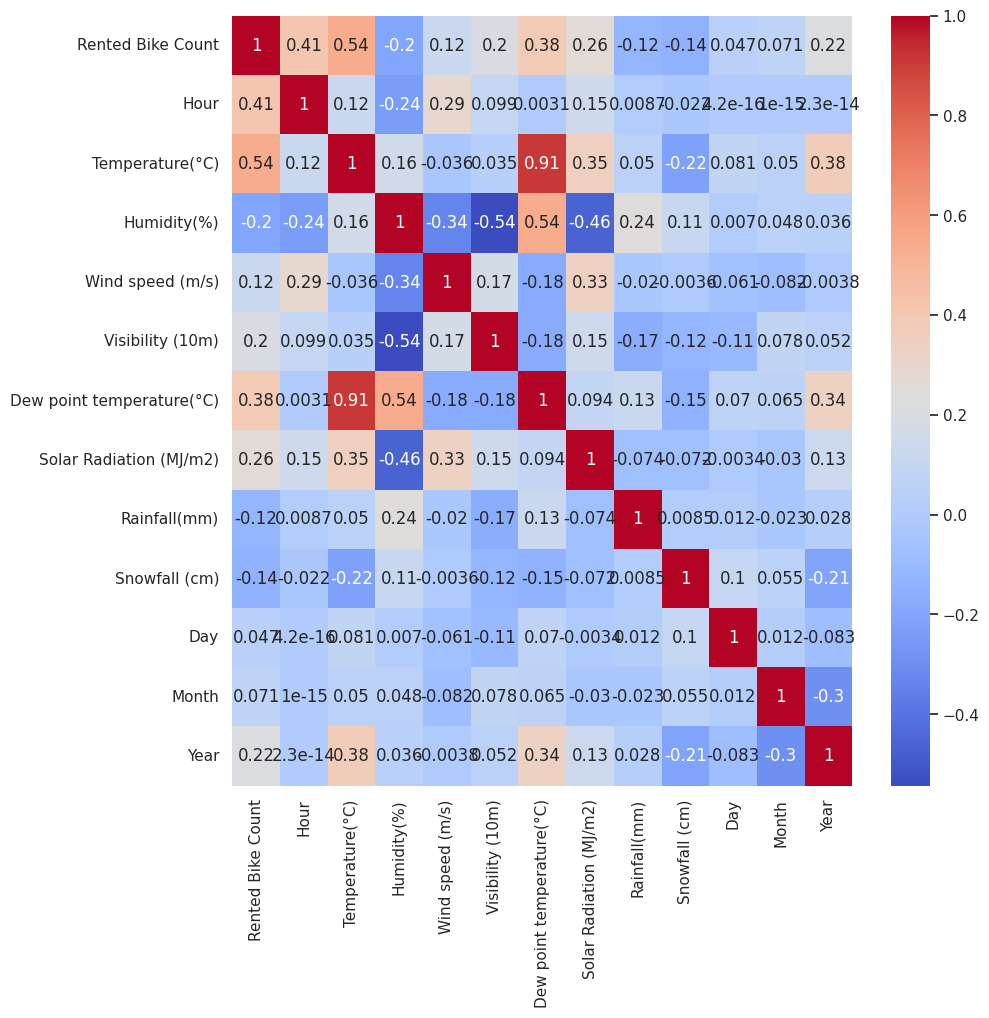

In [28]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot = True,cmap='coolwarm')

Observation : from heatmap we can seem that Temperature and Dew Point Temperature highly correlated with each other.Dew Point Temperature  and Humidity also correlated.

### **Checking relation between input and target variable**

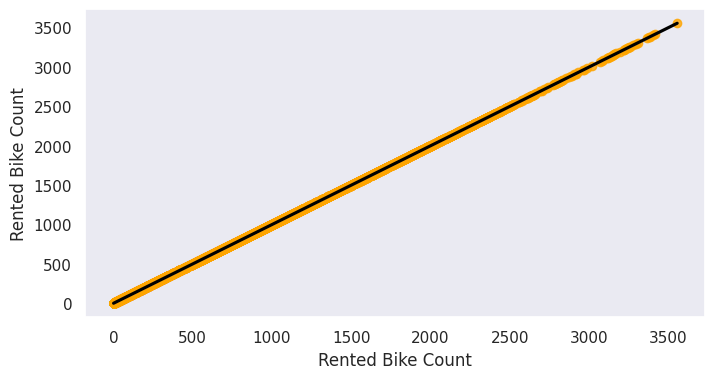

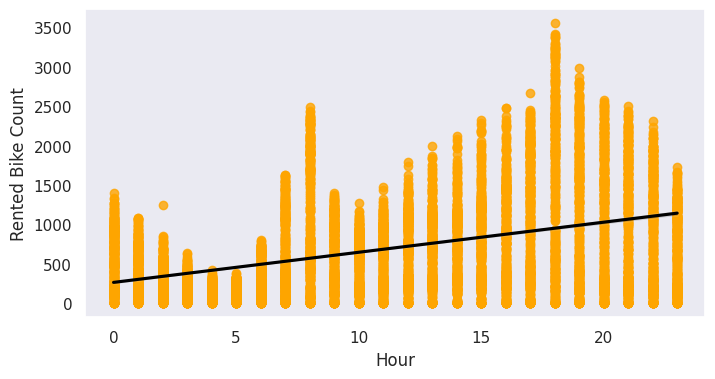

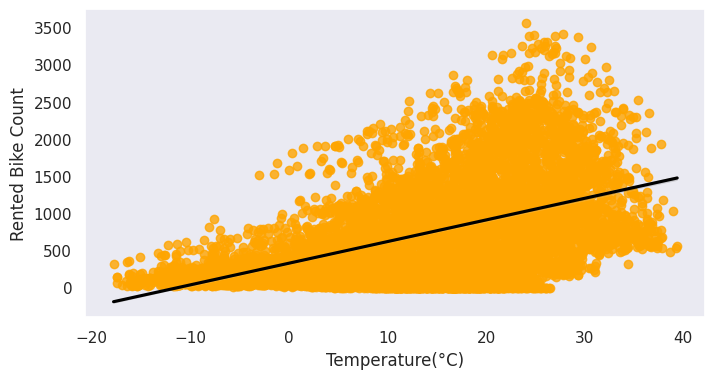

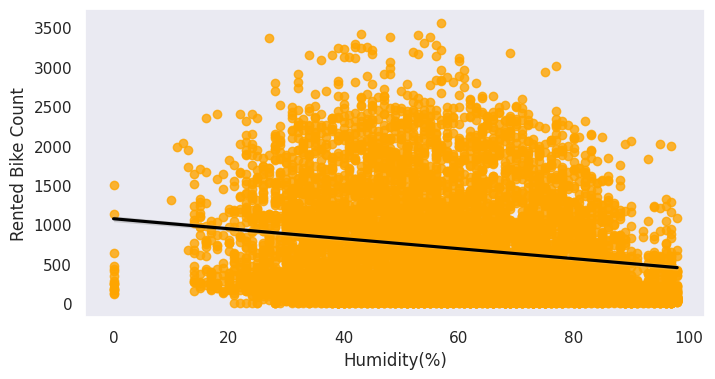

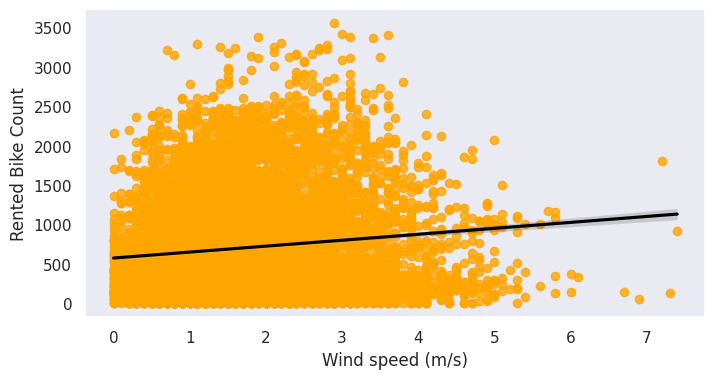

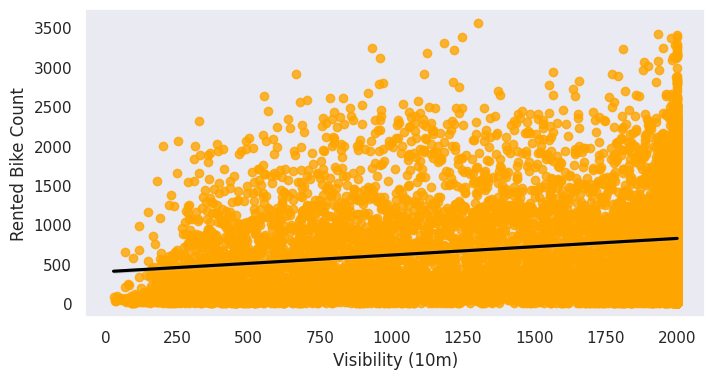

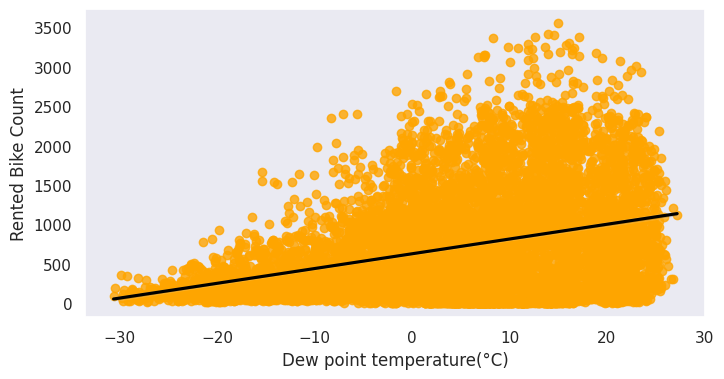

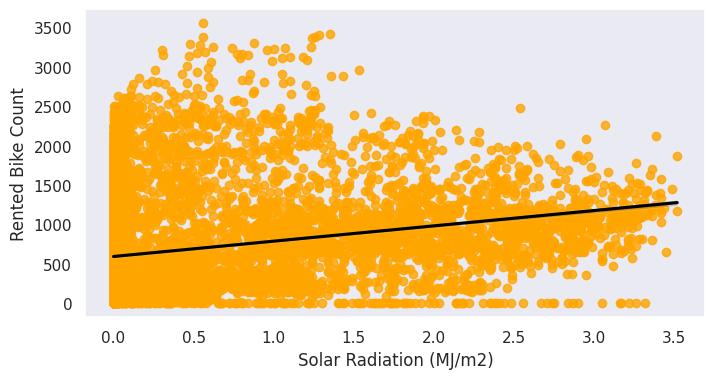

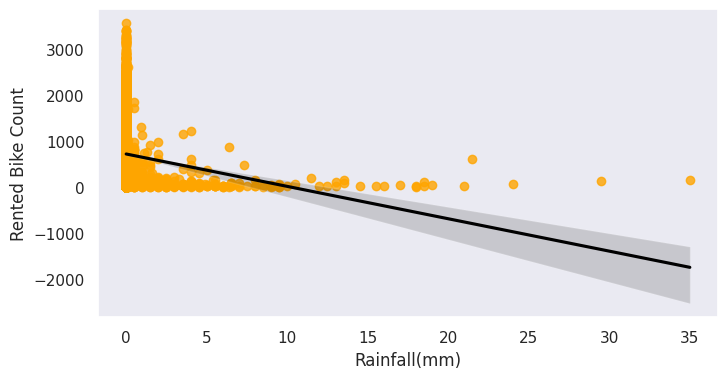

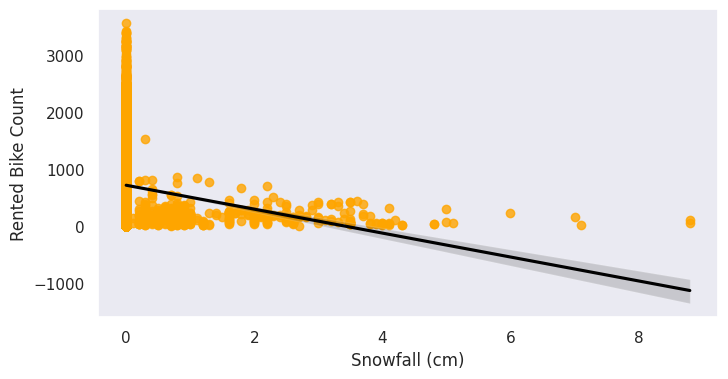

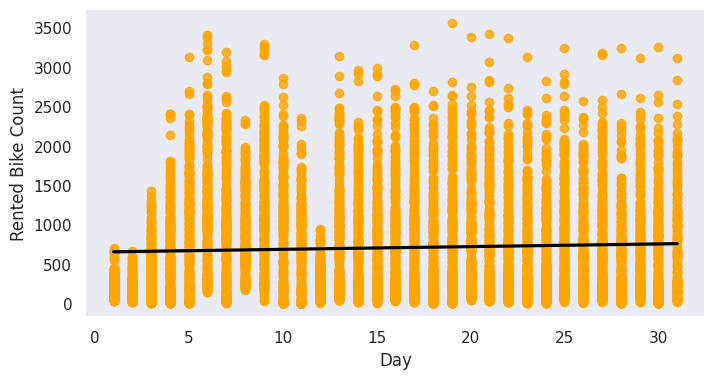

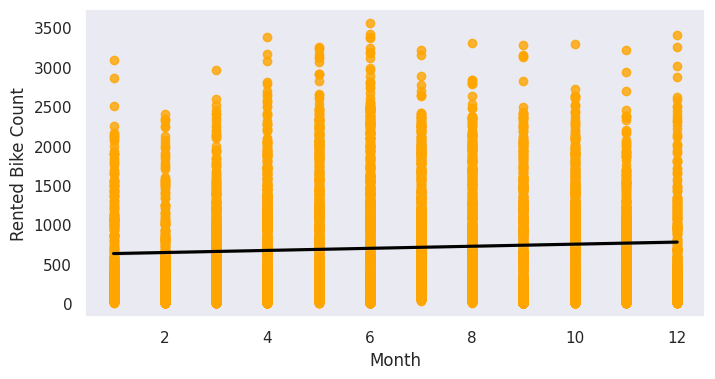

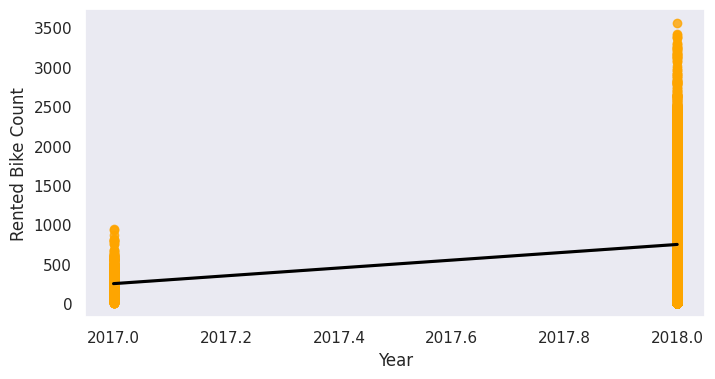

In [29]:
#printing the regression plot for all the numerical features
for col in numeric_features:
  fig,ax=plt.subplots(figsize=(8,4))
  sns.regplot(x=df[col],y=df['Rented Bike Count'],scatter_kws={"color": 'orange'}, line_kws={"color": "black"})

Observation : From the above regression plot of all numerical features we see that the columns 'Temperature', 'Wind_speed','Visibility', 'Dew_point_temperature', 'Solar_Radiation' are positively relation to the target variable.

which means the rented bike count increases with increase of these features.

'Rainfall','Snowfall','Humidity' these features are negatively related with the target variable which means the rented bike count decreases when these features increase.

## **FEATURE ENGINEERING**

**Outlier Treatment**

In [30]:
df_bike = df.copy()

In [31]:
# Calculating the Zscore

df_bike['Wind_speed_zscore'] = (df_bike['Wind speed (m/s)'] - df_bike['Wind speed (m/s)'].mean())/df_bike['Wind speed (m/s)'].std()
df_bike['Solar_Radiation_zscore'] = (df_bike['Solar Radiation (MJ/m2)'] - df_bike['Solar Radiation (MJ/m2)'].mean())/df_bike['Solar Radiation (MJ/m2)'].std()
df_bike['Rainfall_zscore'] = (df_bike['Rainfall(mm)'] - df_bike['Rainfall(mm)'].mean())/df_bike['Rainfall(mm)'].std()
df_bike['Snowfall_zscore'] = (df_bike['Snowfall (cm)'] - df_bike['Snowfall (cm)'].mean())/df_bike['Snowfall (cm)'].std()

Since Wind speed (m/s),Solar Radiation,Rainfall and snowfall has more outliers.we calculate z score for these columns

In [32]:
df_bike = df_bike[(df_bike['Wind_speed_zscore']>-3) & (df_bike['Wind_speed_zscore']<3)]
df_bike = df_bike[(df_bike['Solar_Radiation_zscore']>-3) & (df_bike['Solar_Radiation_zscore']<3)]
df_bike = df_bike[(df_bike['Rainfall_zscore']>-3) & (df_bike['Rainfall_zscore']<3)]
df_bike = df_bike[(df_bike['Snowfall_zscore']>-3) & (df_bike['Snowfall_zscore']<3)]


We have removed outliers by z-score technique

In [33]:
df_bike_new = df_bike.drop(columns=['Wind_speed_zscore','Solar_Radiation_zscore','Rainfall_zscore','Snowfall_zscore'])

In [34]:
df_bike_new.shape,df.shape

((8352, 17), (8760, 17))

new dataframe has 8352 rows.We removed 408 rows

<Axes: xlabel='Rented Bike Count'>

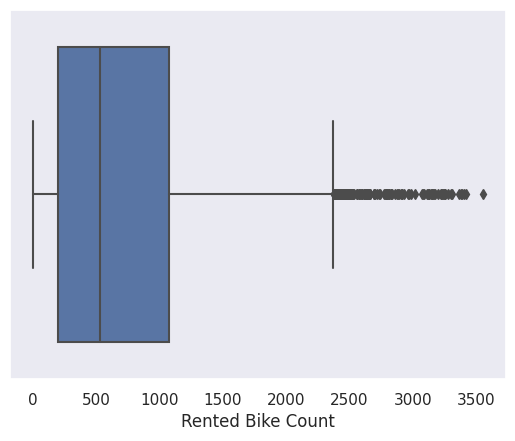

In [35]:
sns.boxplot(x=df_bike_new['Rented Bike Count'])

Observation : we have many outliers in our target variable.We will remove it by applying square root transformation

In [36]:
df_bike_new['Rented Bike Count'] = np.sqrt(df_bike_new['Rented Bike Count'])

<Axes: xlabel='Rented Bike Count'>

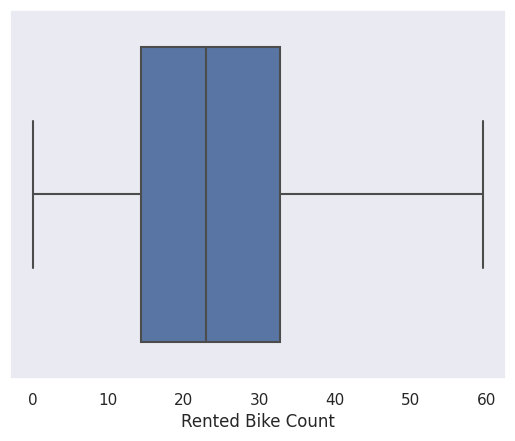

In [37]:
sns.boxplot(x=df_bike_new['Rented Bike Count'])

We have removed outliers from our target variables

**Multicollinearity**

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [39]:
def get_vif(df):
  vif_data = pd.DataFrame()
  vif_data["Variable"] = df.columns
  vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]

  return vif_data


In [40]:
not_for_vif = ['Rented Bike Count','Day','Month','Year']
get_vif(df_bike_new[[i for i in df_bike_new.describe().columns if i not in not_for_vif]])


Variable        VIF
0                       Hour   4.379814
1            Temperature(°C)  33.550735
2                Humidity(%)   5.533217
3           Wind speed (m/s)   5.057268
4           Visibility (10m)   9.198566
5  Dew point temperature(°C)  17.106432
6    Solar Radiation (MJ/m2)   2.807587
7               Rainfall(mm)   1.136664
8              Snowfall (cm)   1.127568

Observation : here VIF of Temperature(°C) and Dew point temperature(°C) is very high.but we will keep Temperature(°C) because it is highly correlated with our dependant variable





In [41]:
not_for_vif_ = ['Rented Bike Count','Day','Month','Year','Dew point temperature(°C)','Humidity(%)']
get_vif(df_bike_new[[i for i in df_bike_new.describe().columns if i not in not_for_vif_]])


Variable       VIF
0                     Hour  3.817538
1          Temperature(°C)  2.490088
2         Wind speed (m/s)  4.507056
3         Visibility (10m)  4.262115
4  Solar Radiation (MJ/m2)  1.870987
5             Rainfall(mm)  1.057567
6            Snowfall (cm)  1.100416

Observation : After removing Dew point temperature(°C) and Humidity(%) column we have removed multicollinearity issue from our dataset.

In [42]:
df_bike_new = df_bike_new.drop(columns=['Dew point temperature(°C)','Humidity(%)'])

**Encoding**

In [43]:
df_bike_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8352 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        8352 non-null   float64
 1   Hour                     8352 non-null   int64  
 2   Temperature(°C)          8352 non-null   float64
 3   Wind speed (m/s)         8352 non-null   float64
 4   Visibility (10m)         8352 non-null   int64  
 5   Solar Radiation (MJ/m2)  8352 non-null   float64
 6   Rainfall(mm)             8352 non-null   float64
 7   Snowfall (cm)            8352 non-null   float64
 8   Seasons                  8352 non-null   object 
 9   Holiday                  8352 non-null   object 
 10  Functioning Day          8352 non-null   object 
 11  Day                      8352 non-null   int64  
 12  Day_Name                 8352 non-null   object 
 13  Month                    8352 non-null   int64  
 14  Year                    

In [44]:
categorical_features = ['Seasons','Holiday','Functioning Day','Day_Name ']

In [45]:
df_bike_new['Day_Name'].value_counts()

Sunday       1253
Saturday     1195
Tuesday      1194
Friday       1188
Thursday     1180
Wednesday    1179
Monday       1163
Name: Day_Name, dtype: int64

In [46]:
df_bike_new['Seasons'].value_counts()

Spring    2126
Autumn    2118
Summer    2117
Winter    1991
Name: Seasons, dtype: int64

In [47]:
df_bike_new['Holiday'].value_counts()

No Holiday    7927
Holiday        425
Name: Holiday, dtype: int64

In [48]:
df_bike_new['Functioning Day'].value_counts()

Yes    8064
No      288
Name: Functioning Day, dtype: int64

In [49]:
#making copy of dataframe
new_df = df_bike_new.copy()

In [50]:
#Since Holiday and Functioning Day have only two values.we will replace them to 0 and 1
new_df['Holiday'] = df['Holiday'].map({'No Holiday':0,'Holiday':1})
new_df['Functioning Day'] = df['Functioning Day'].map({'No':0,'Yes':1})

In [51]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8352 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        8352 non-null   float64
 1   Hour                     8352 non-null   int64  
 2   Temperature(°C)          8352 non-null   float64
 3   Wind speed (m/s)         8352 non-null   float64
 4   Visibility (10m)         8352 non-null   int64  
 5   Solar Radiation (MJ/m2)  8352 non-null   float64
 6   Rainfall(mm)             8352 non-null   float64
 7   Snowfall (cm)            8352 non-null   float64
 8   Seasons                  8352 non-null   object 
 9   Holiday                  8352 non-null   int64  
 10  Functioning Day          8352 non-null   int64  
 11  Day                      8352 non-null   int64  
 12  Day_Name                 8352 non-null   object 
 13  Month                    8352 non-null   int64  
 14  Year                    

Splitting Data

In [52]:
X = new_df.drop(columns=['Rented Bike Count'])
y = new_df['Rented Bike Count']

In [53]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [54]:
X_train.columns

Index(['Hour', 'Temperature(°C)', 'Wind speed (m/s)', 'Visibility (10m)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'Day', 'Day_Name', 'Month', 'Year'],
      dtype='object')

**OneHotEncoding**

In [55]:
transformer = ColumnTransformer(transformers=[
    ('t1',OneHotEncoder(drop = 'first',sparse=False),['Seasons','Day_Name'])
],remainder='passthrough'
)

In [56]:
X_train = transformer.fit_transform(X_train)
X_test = transformer.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


**Feature Scaling**

In [57]:
#creating feature of standard scaler
ss = StandardScaler()

#applying standard scaler on x_train and x_test
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

**Column Transformation**

In [58]:
pw = PowerTransformer(method = 'yeo-johnson')

In [59]:
X_train_transformed = pw.fit_transform(X_train)
X_test_transformed = pw.transform(X_test)

## **TRAINING ML MODEL**

**Linear Regression**

In [60]:
#making an object of LinearRegression
lr = LinearRegression()

#fitting our model
lr.fit(X_train_transformed,y_train)


LinearRegression()

In [61]:
y_pred_train_lr = lr.predict(X_train_transformed)
y_pred_lr = lr.predict(X_test_transformed)


**Lasso Regression**

In [62]:
ls = Lasso(alpha=0.01,max_iter=100)
ls.fit(X_train_transformed,y_train)


Lasso(alpha=0.01, max_iter=100)

In [63]:
y_pred_ls = ls.predict(X_test_transformed)
y_pred_train_ls = ls.predict(X_train_transformed)


**Ridge Regression**

In [64]:
rg = Ridge(alpha=20,max_iter=1)
rg.fit(X_train_transformed,y_train)


Ridge(alpha=20, max_iter=1)

In [65]:
y_pred_rg = rg.predict(X_test_transformed)
y_pred_train_rg = rg.predict(X_train_transformed)

**ElasticNet Regression**

In [66]:
el = ElasticNet(alpha=0.01, l1_ratio=0.8, max_iter=100)
el.fit(X_train_transformed,y_train)


ElasticNet(alpha=0.01, l1_ratio=0.8, max_iter=100)

In [67]:
y_pred_el = el.predict(X_test_transformed)
y_pred_train_el = el.predict(X_train_transformed)

**Pollynomial regression**

In [68]:
poly = PolynomialFeatures(2)
X_train_poly = poly.fit_transform(X_train_transformed)
X_test_poly = poly.transform(X_test_transformed)
lr.fit(X_train_poly,y_train)
# y_pred_poly = lr.predict(X_test_poly)
# r2_score(y_test,y_pred_poly)

LinearRegression()

In [69]:
y_pred_poly = lr.predict(X_test_poly)
y_pred_train_poly = lr.predict(X_train_poly)

**Stochastic-Gradient-Descent**

In [70]:
sgd = SGDRegressor(alpha=0.01,max_iter=100)
sgd.fit(X_train_transformed,y_train)


SGDRegressor(alpha=0.01, max_iter=100)

In [71]:
y_pred_sgd = sgd.predict(X_test_transformed)
y_pred_train_sgd = sgd.predict(X_train_transformed)

**Model evaluation**

We will create a function which will give metrics and graphs of our model

In [72]:
# Creating function for metrics
def get_metrics(y_true_train,y_pred_train,y_true_test,y_pred_test,model_name):

  Train_MAE = mean_absolute_error(y_true_train,y_pred_train)
  Train_MSE = mean_squared_error(y_true_train,y_pred_train)
  Train_R2_Score = r2_score(y_true_train,y_pred_train)
  Train_RMSE = np.sqrt(Train_MSE)

  Test_MAE = mean_absolute_error(y_true_test,y_pred_test)
  Test_MSE = mean_squared_error(y_true_test,y_pred_test)
  Test_R2_Score = r2_score(y_true_test,y_pred_test)
  Test_RMSE = np.sqrt(Test_MSE)

  residual = y_pred_test - y_true_test

  Predicted_vs_Actual_1 = plt.figure(figsize=(16,5))
  plt.plot(y_pred_test)
  plt.plot(np.array(y_true_test))
  plt.legend(["Predicted","Actual"],)
  plt.title("Predicted V/S Actual")
  plt.show()

  Predicted_vs_Actual = plt.figure(figsize=(16,5))
  sns.regplot(x=y_true_test,y=y_pred_test,label='Predicted vs Actual', color='orange',line_kws={'color':'black'})
  plt.title('Actual Vs prediction')
  plt.ylabel('Pedicted')
  plt.xlabel('Actual')
  plt.show()

  homoscedasticity = plt.figure(figsize=(16,5))
  sns.regplot(x=y_pred_test,y=residual,color='orange',line_kws={'color':'black'})
  plt.title('Plot for checking Homoscedasticity')
  plt.ylabel('Residual')
  plt.xlabel('Prediction')
  plt.show()

  kde_plot = plt.figure(figsize=(9,5))
  sns.kdeplot(residual,fill = True)
  plt.title('Residual Distribution')
  plt.show()

  autocorrelation = plt.figure(figsize=(16,5))
  plt.plot(residual)
  plt.title('Plot for Checking Autocorrelation of Errors')
  plt.show()



  evaluation_dict = {'model_name':model_name,'Train_MAE':round(Train_MAE,4),'Train_MSE':round(Train_MSE,4),
                     'Train_R2_Score':round(Train_R2_Score,4),'Train_RMSE':round(Train_RMSE,4),
                     'Test_RMSE':round(Test_RMSE,4),'Test_MAE':round(Test_MAE,4),'Test_MSE':round(Test_MSE,4),
                     'Test_R2_Score':round(Test_R2_Score,4)
                     }

  result = pd.DataFrame(evaluation_dict,index=[1])

  return result
  return Predicted_vs_Actual_1,Predicted_vs_Actual,homoscedasticity,kde_plot,autocorrelation



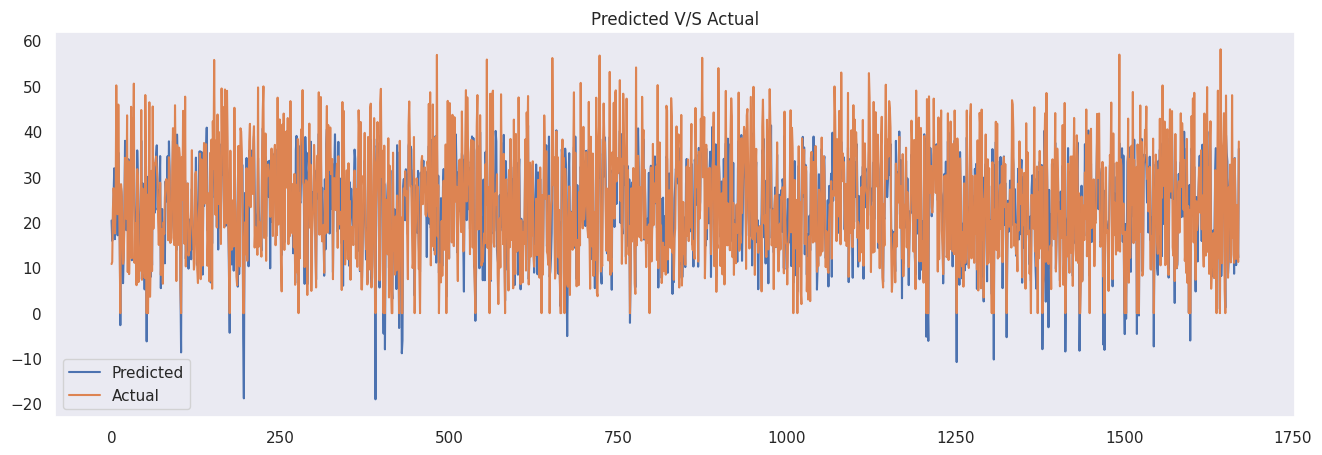

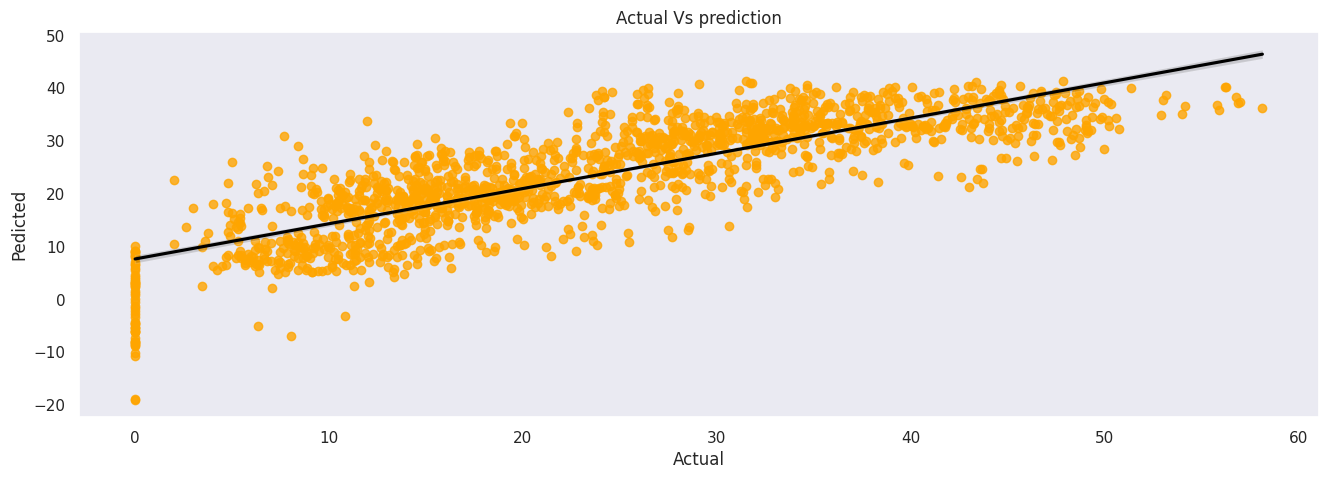

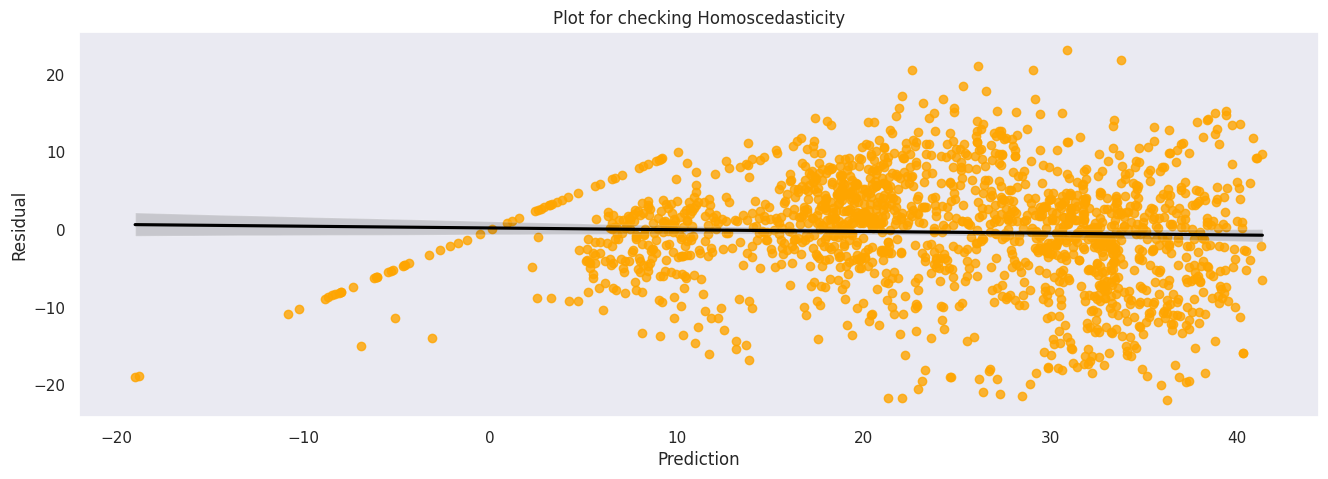

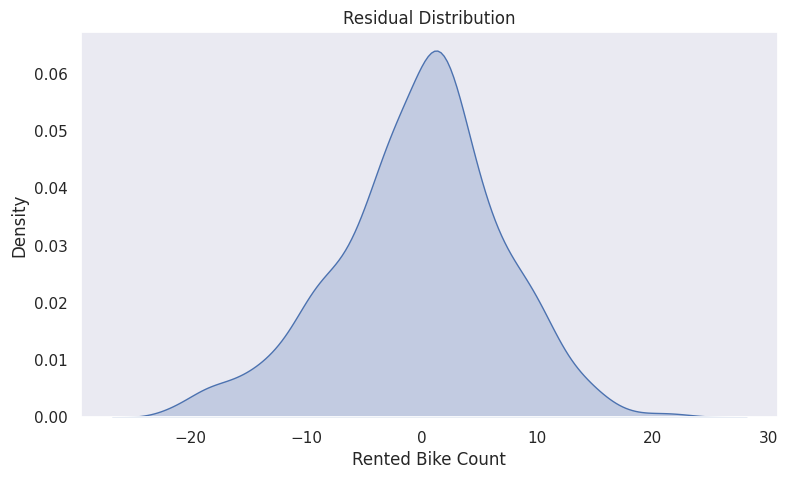

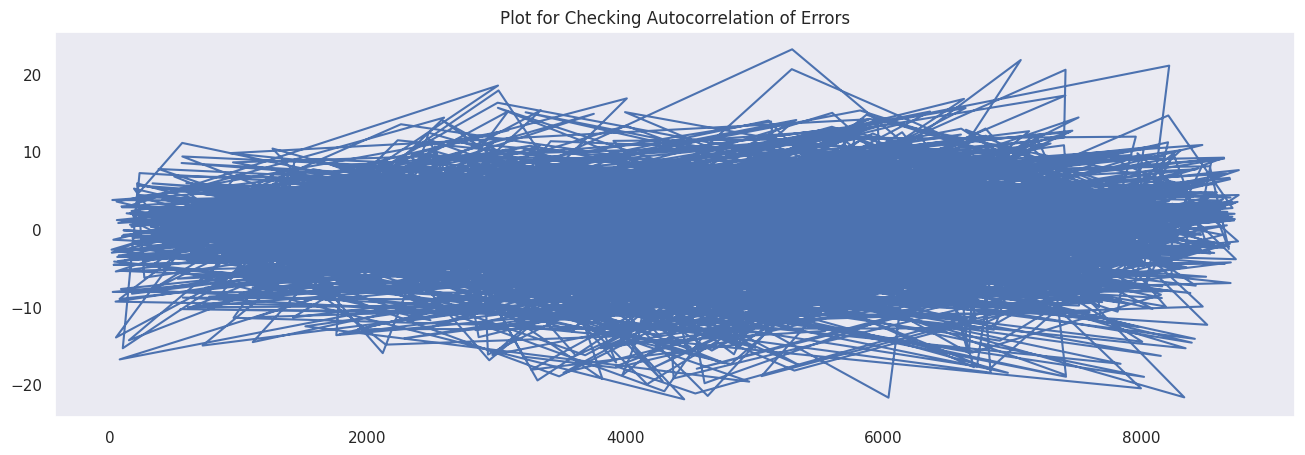

model_name  Train_MAE  Train_MSE  Train_R2_Score  Train_RMSE  \
1  LinearRegression     5.5093    50.7862           0.666      7.1264   

   Test_RMSE  Test_MAE  Test_MSE  Test_R2_Score  
1     7.2001    5.5793   51.8409         0.6815

In [73]:
get_metrics(y_train,y_pred_train_lr,y_test,y_pred_lr,'LinearRegression')

Observation : On testing data R2 score is 0.6815 which is almost close to training data R2 score.Hence we can say that our model performance is good and overfitting is not observed.

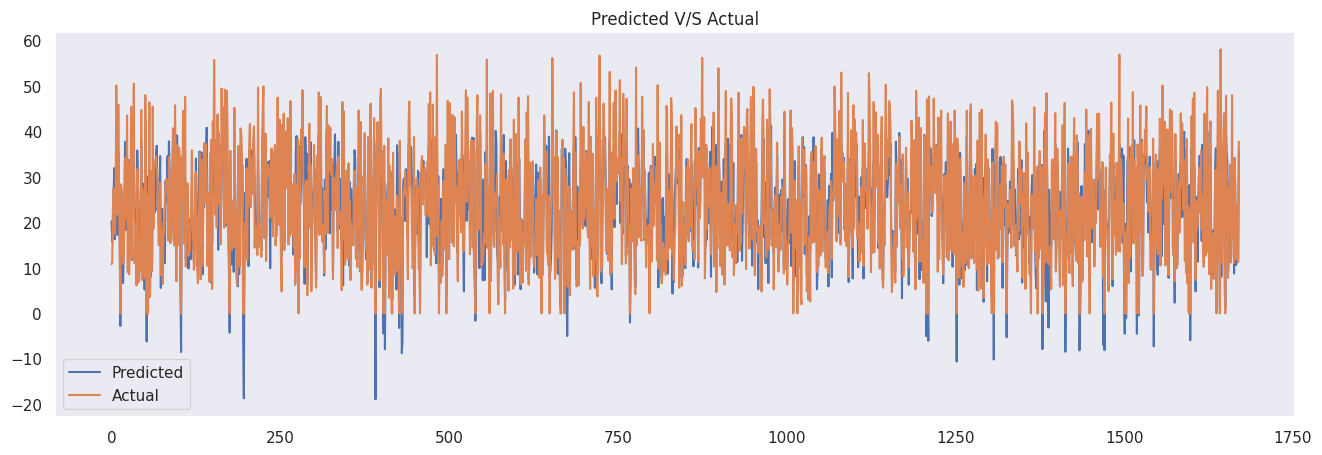

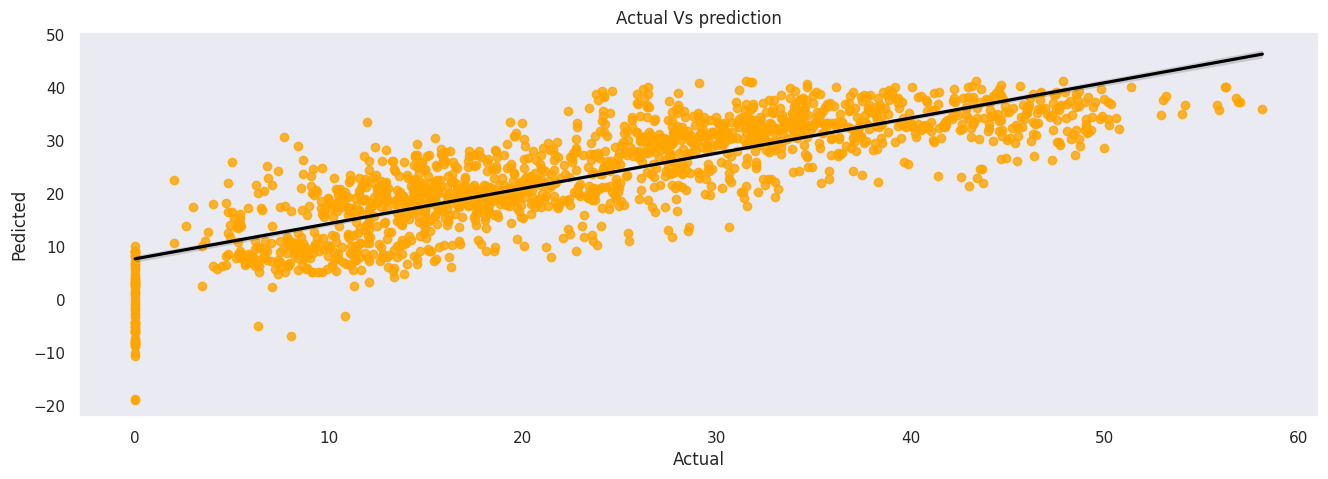

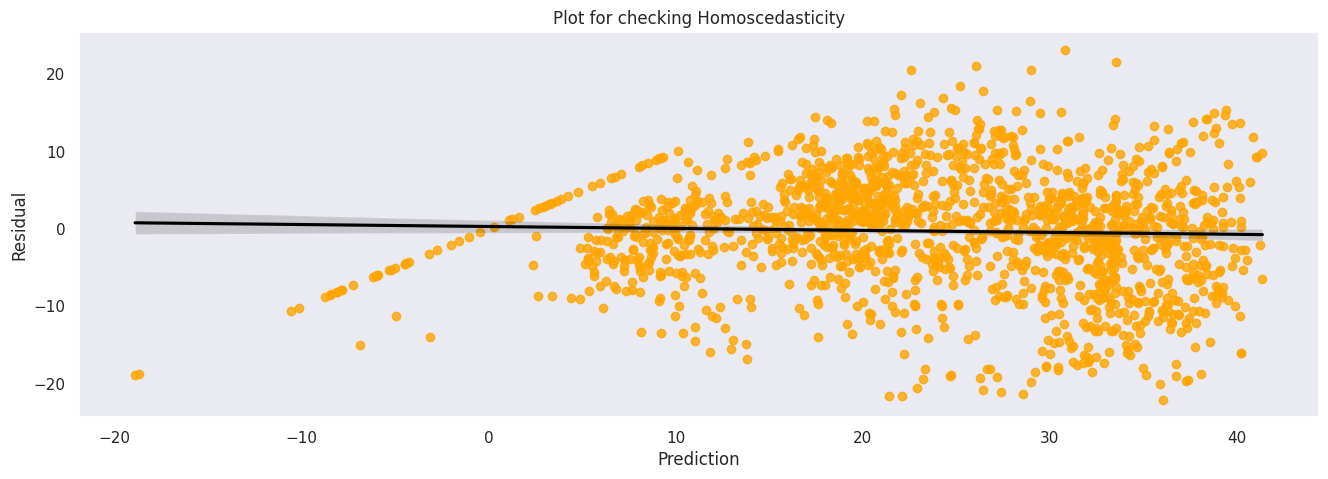

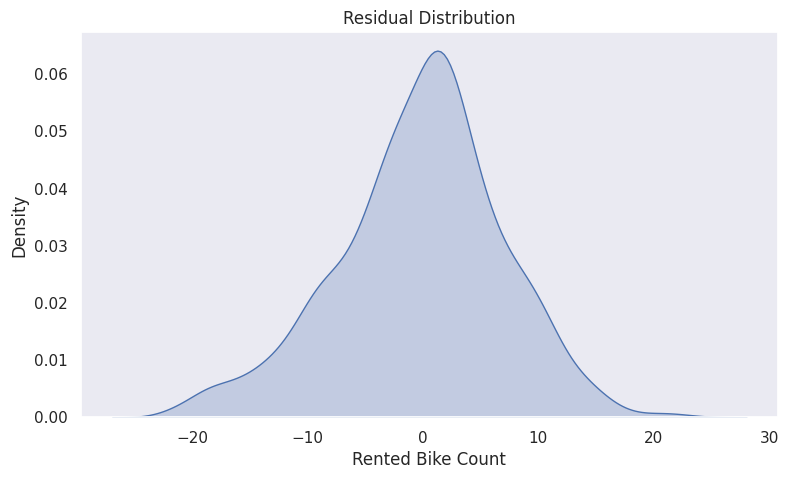

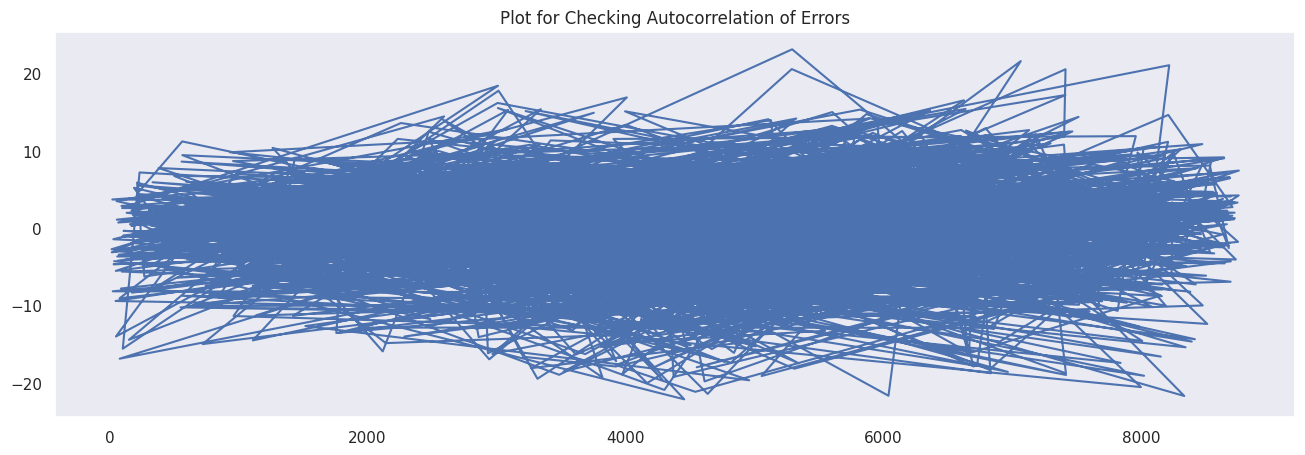

model_name  Train_MAE  Train_MSE  Train_R2_Score  Train_RMSE  \
1  Lasso Regression     5.5105    50.7927          0.6659      7.1269   

   Test_RMSE  Test_MAE  Test_MSE  Test_R2_Score  
1     7.2007    5.5805   51.8505         0.6814

In [74]:
get_metrics(y_train,y_pred_train_ls,y_test,y_pred_ls,'Lasso Regression')

observation : On testing data R2 score is 0.6814 which is almost close to training data R2 score.Hence we can say that our model performance is good and overfitting is not observed.

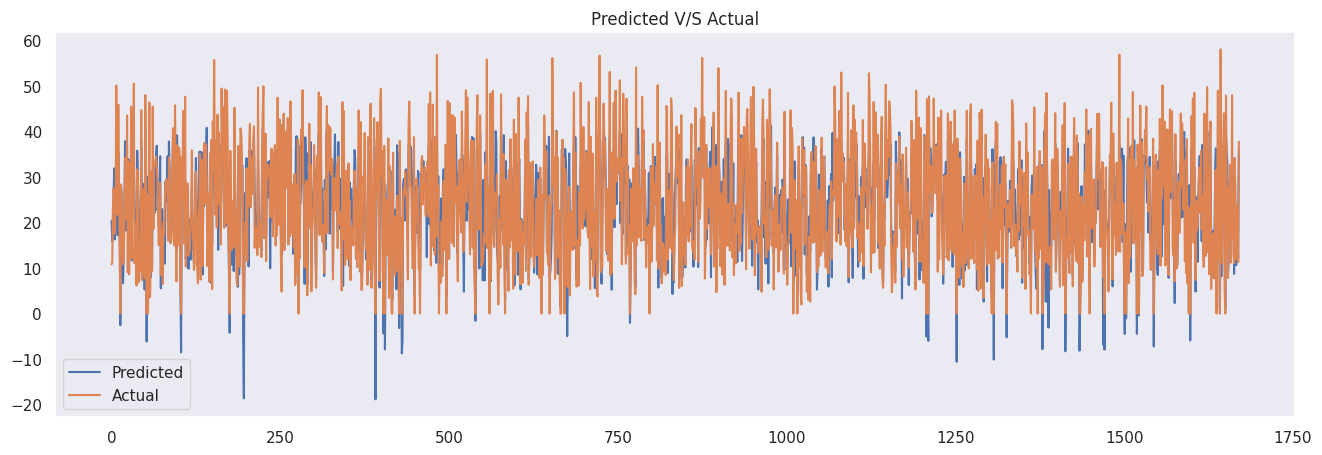

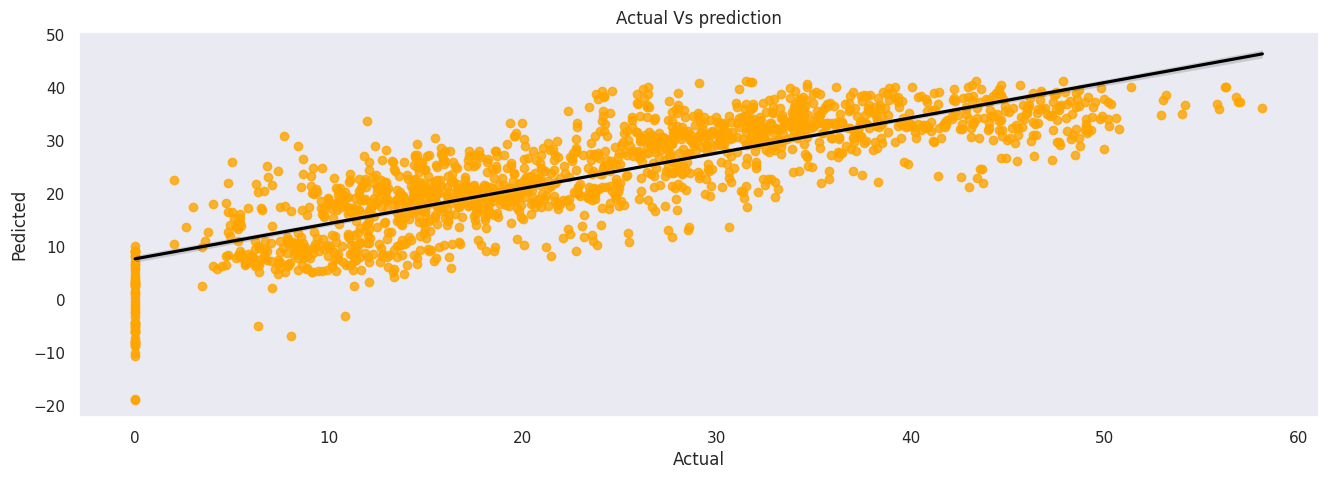

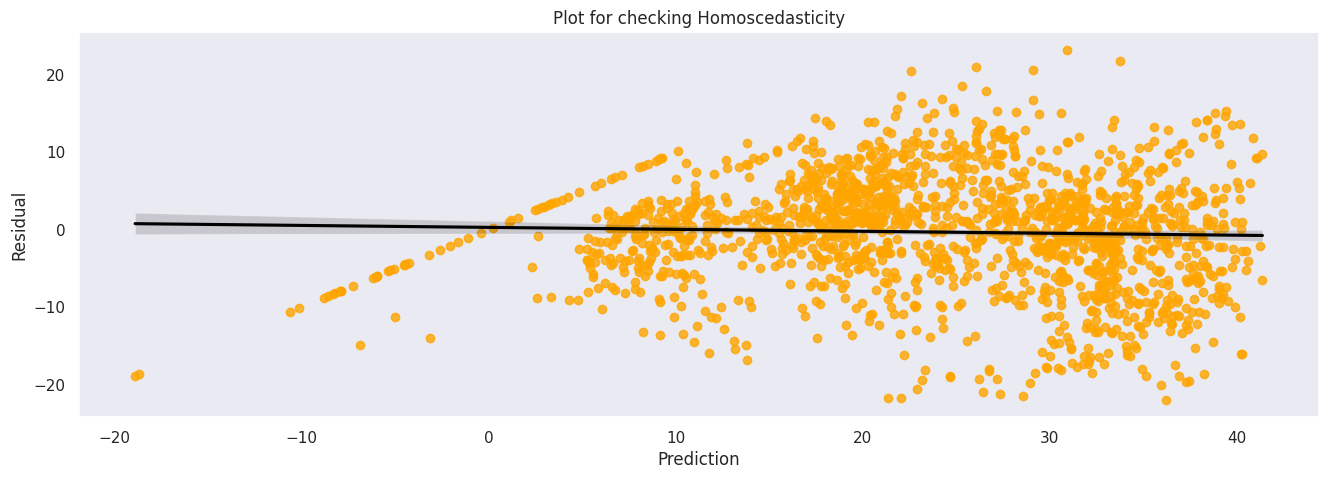

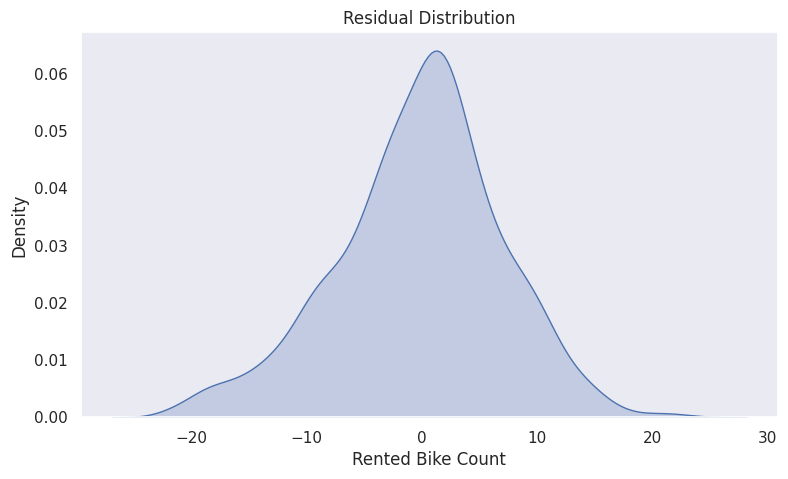

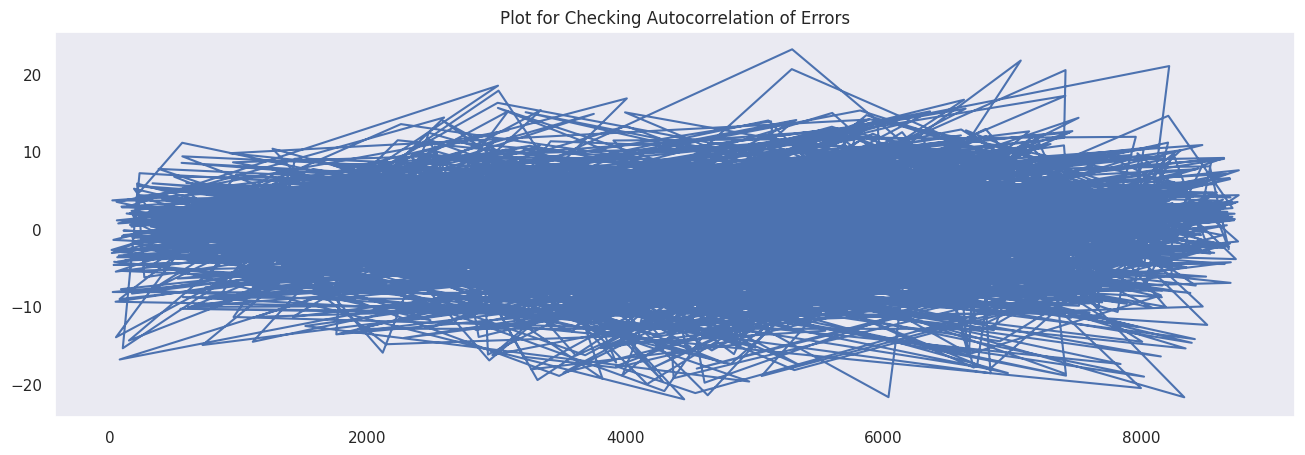

model_name  Train_MAE  Train_MSE  Train_R2_Score  Train_RMSE  \
1  Ridge Regression     5.5108    50.7878           0.666      7.1266   

   Test_RMSE  Test_MAE  Test_MSE  Test_R2_Score  
1     7.2015     5.581   51.8613         0.6813

In [75]:
get_metrics(y_train,y_pred_train_rg,y_test,y_pred_rg,'Ridge Regression')

Observation : On testing data R2 score is 0.6815 which is almost close to training data R2 score.Hence we can say that our model performance is good and overfitting is not observed.

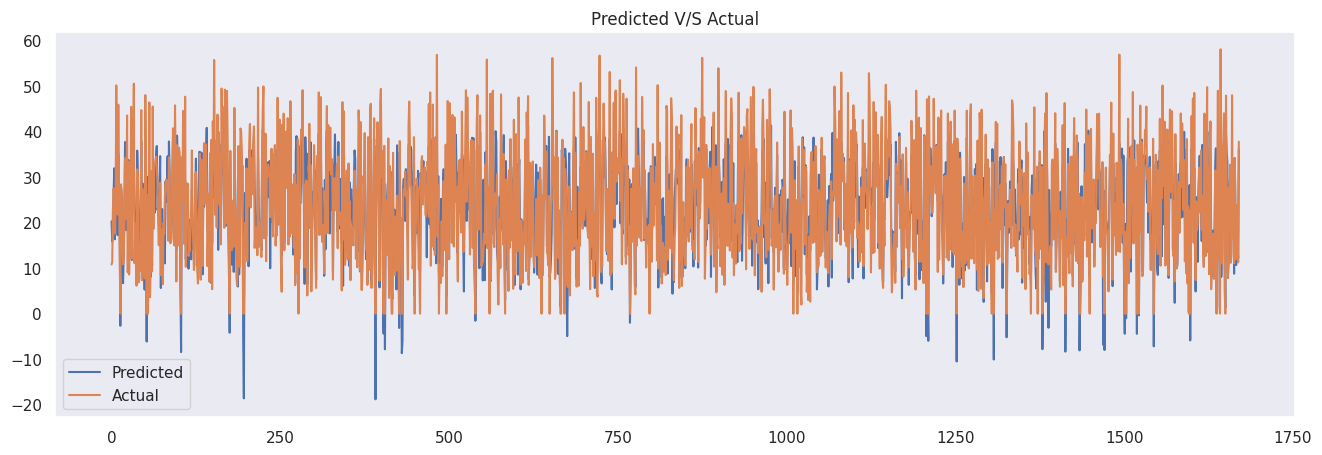

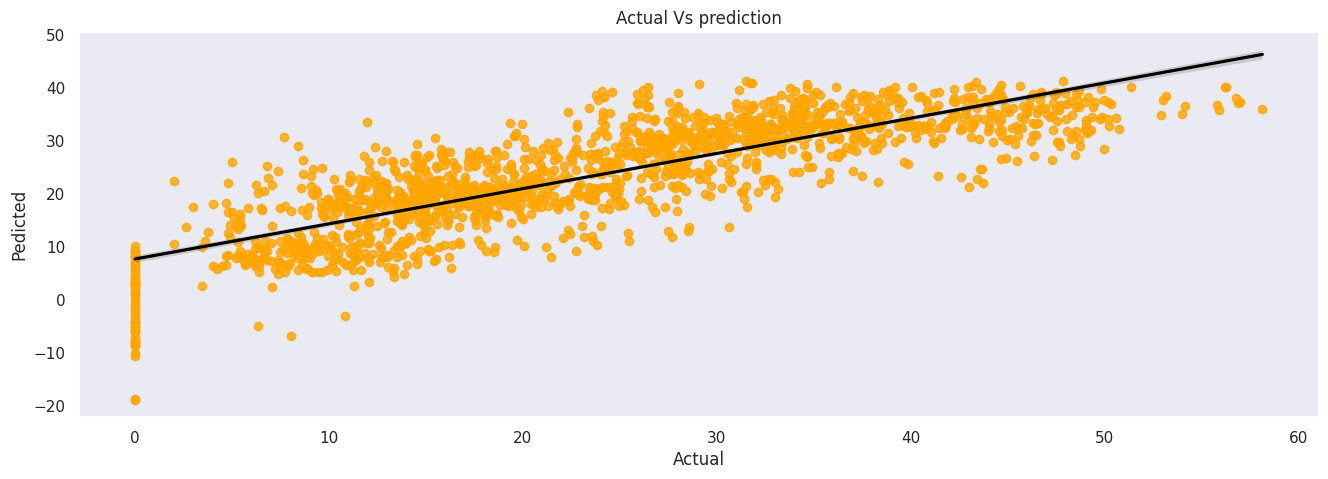

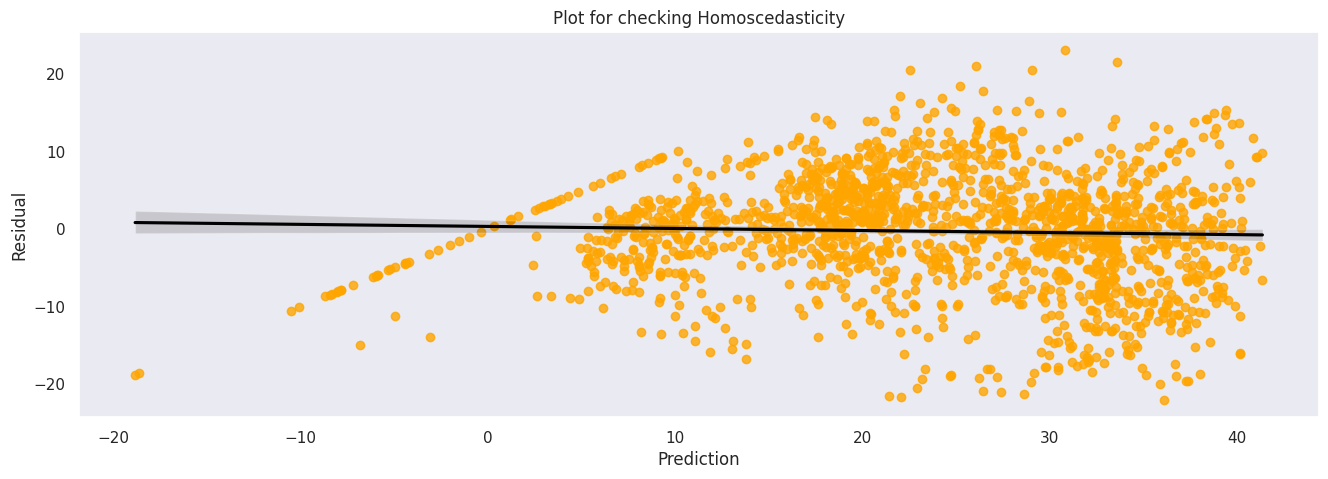

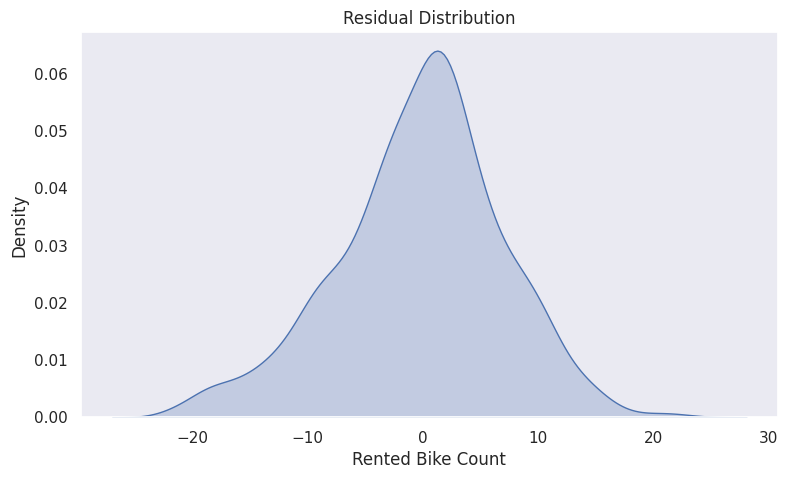

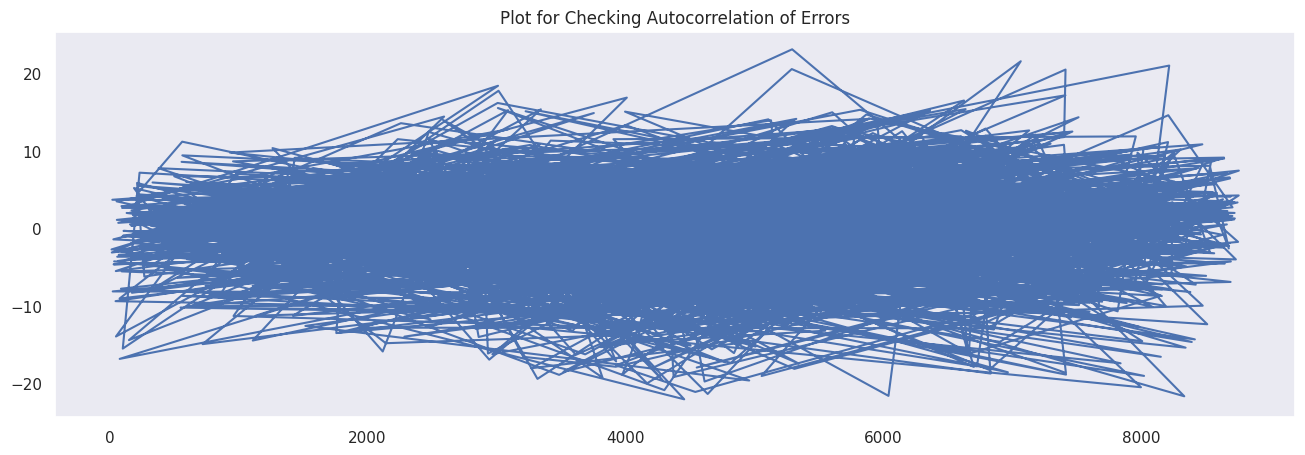

model_name  Train_MAE  Train_MSE  Train_R2_Score  Train_RMSE  \
1  ElasticNet Regression     5.5112    50.7931          0.6659      7.1269   

   Test_RMSE  Test_MAE  Test_MSE  Test_R2_Score  
1     7.2016    5.5814   51.8635         0.6813

In [76]:
get_metrics(y_train,y_pred_train_el,y_test,y_pred_el,'ElasticNet Regression')

Observation : On testing data R2 score is 0.6812 which is almost close to training data R2 score.Hence we can say that our model performance is good and overfitting is not observed.

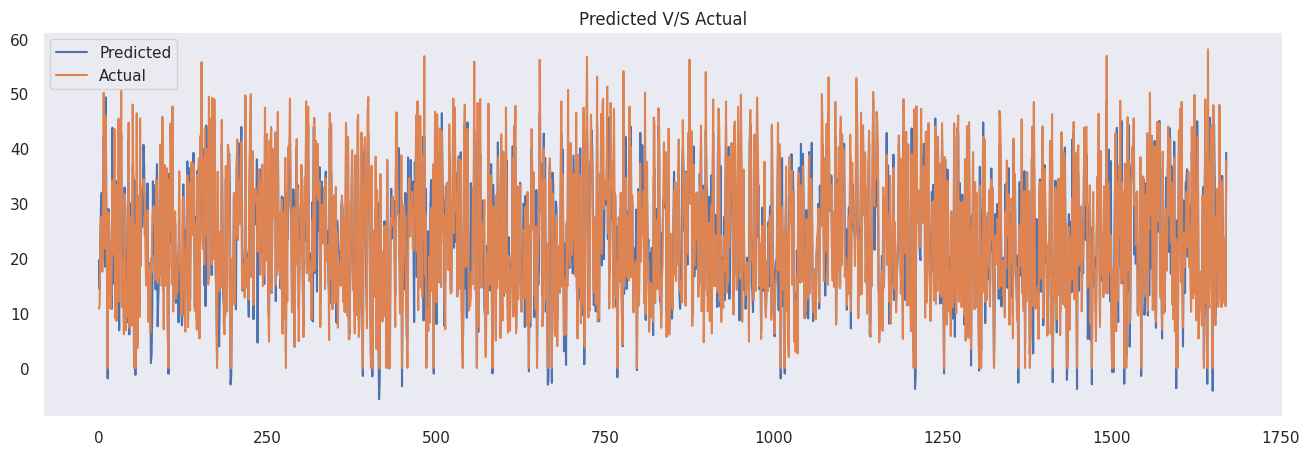

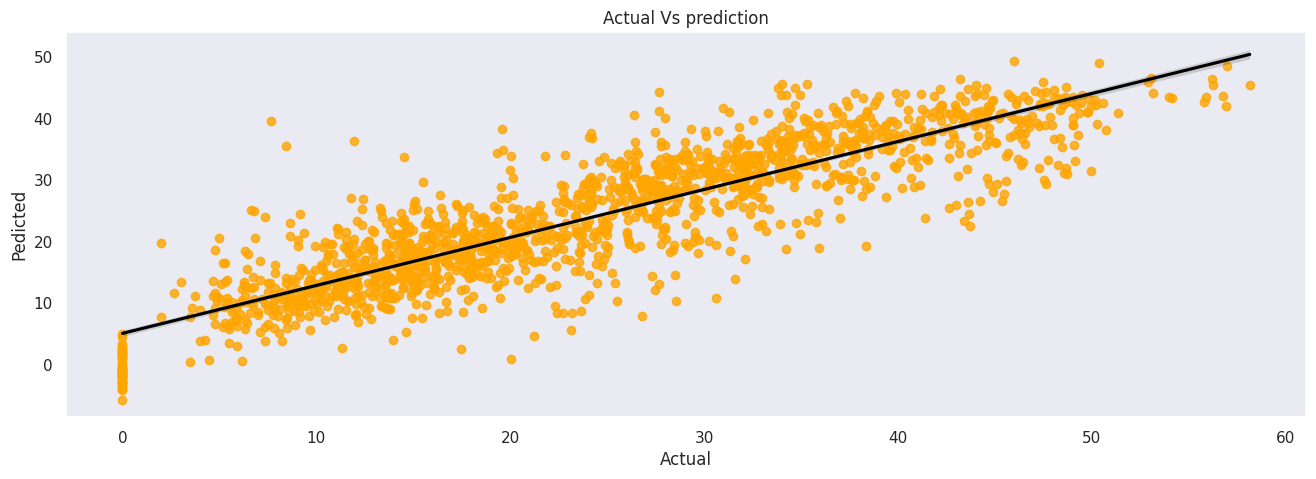

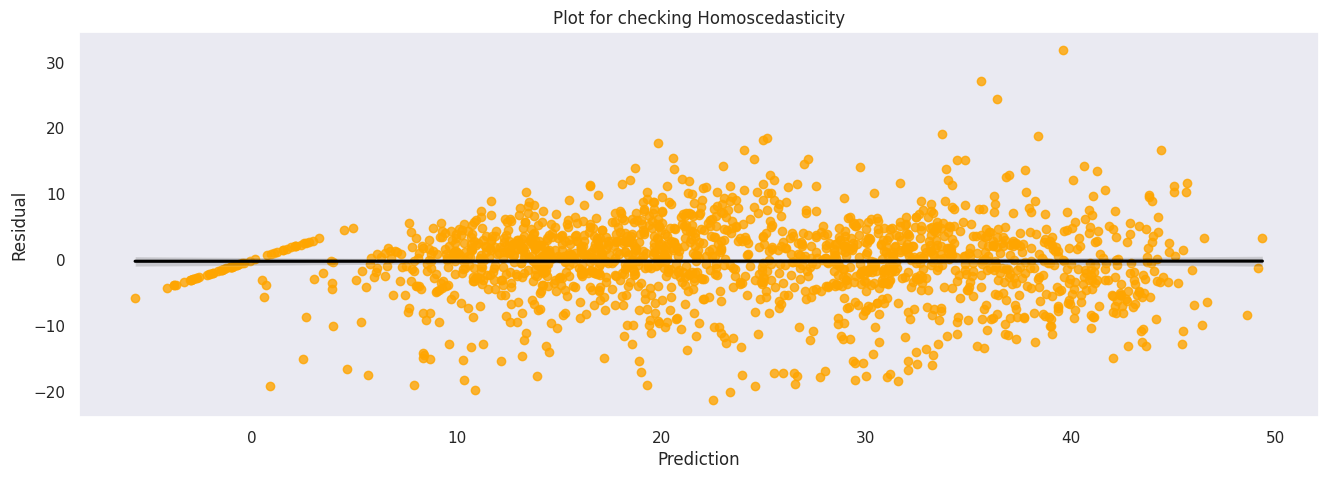

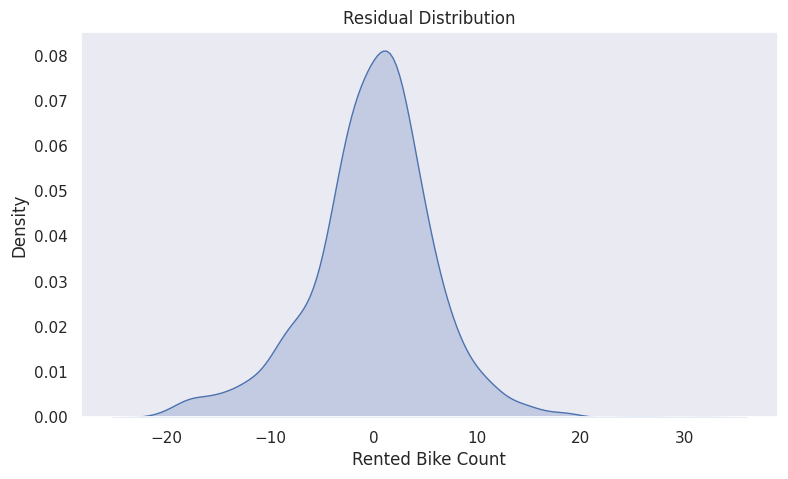

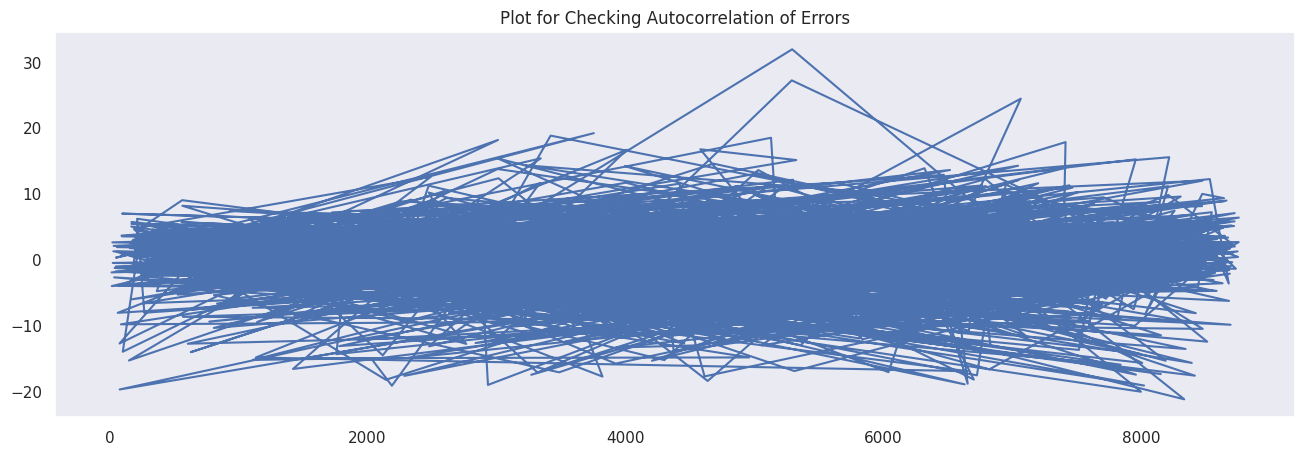

model_name  Train_MAE  Train_MSE  Train_R2_Score  Train_RMSE  \
1  Pollynomial regression     4.3096      33.19          0.7817      5.7611   

   Test_RMSE  Test_MAE  Test_MSE  Test_R2_Score  
1     5.9802    4.4227    35.763         0.7803

In [77]:
get_metrics(y_train,y_pred_train_poly,y_test,y_pred_poly,'Pollynomial regression')

Observation : On testing data R2 score is 0.7803 which is almost close to training data R2 score.Hence we can say that our model performance is good and overfitting is not observed.

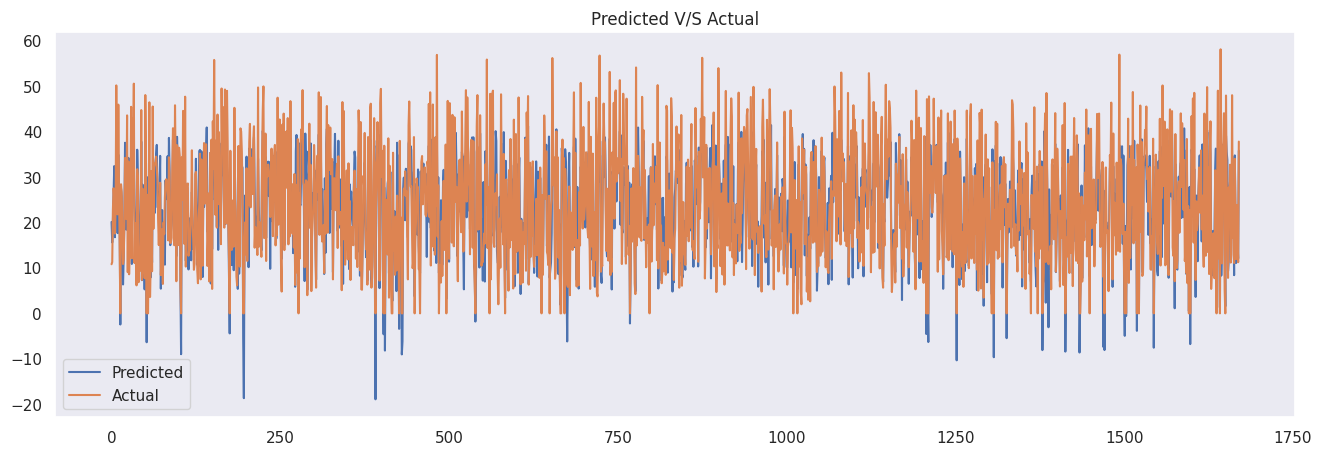

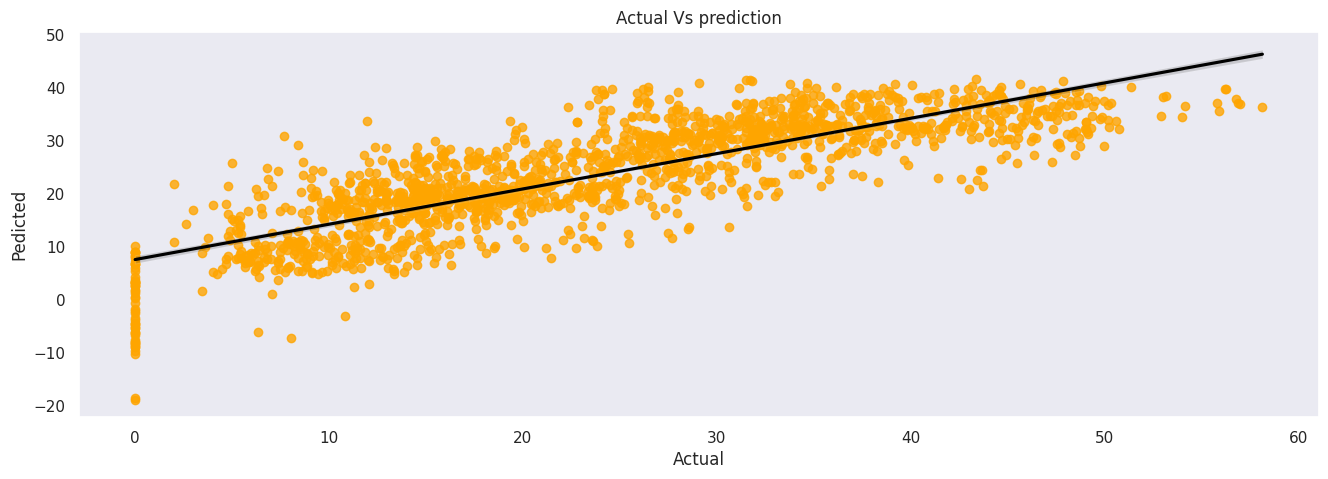

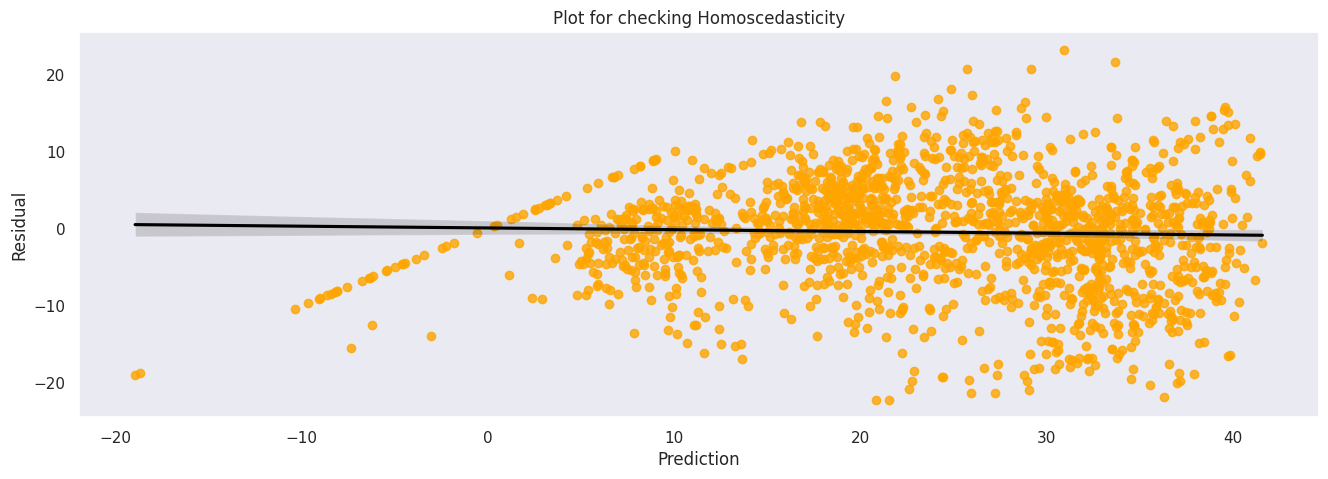

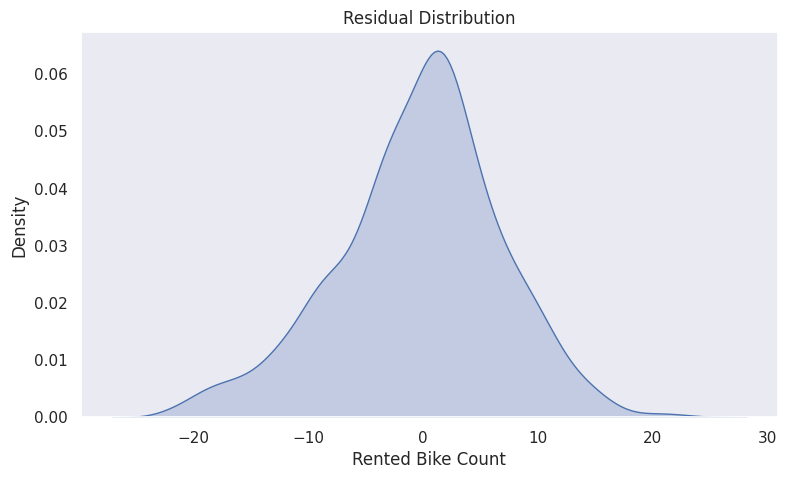

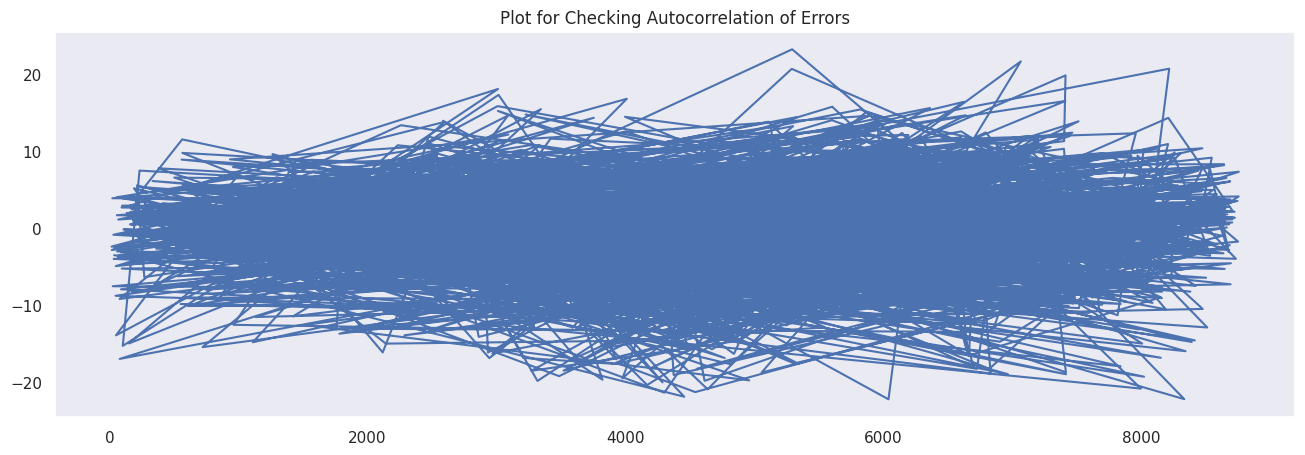

model_name  Train_MAE  Train_MSE  Train_R2_Score  \
1  Stochastic-Gradient-Descent     5.5148     50.947          0.6649   

   Train_RMSE  Test_RMSE  Test_MAE  Test_MSE  Test_R2_Score  
1      7.1377     7.2044    5.5758   51.9028         0.6811

In [78]:
get_metrics(y_train,y_pred_train_sgd,y_test,y_pred_sgd,'Stochastic-Gradient-Descent')

Observation : On testing data R2 score is 0.6786 which is almost close to training data R2 score.Hence we can say that our model performance is good and overfitting is not observed.

**Cross validation and Hyper Parameter Tuning**

In [79]:
# cross validation on Ridge regression
# creating object
ridge_reg=Ridge()

# alphas values's dictionary to pass on in Gridsearchcv
alphas = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],
          "max_iter":[1,10,20,50,100,120,150,200,250,500,100]
          }

ridge_linear_reg = GridSearchCV(ridge_reg, alphas, scoring='neg_mean_squared_error', cv=4)
# fitting model
ridge_linear_reg.fit(X_train_transformed, y_train)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'max_iter': [1, 10, 20, 50, 100, 120, 150, 200, 250,
                                      500, 100]},
             scoring='neg_mean_squared_error')

In [80]:
print(f'The best alpha value is {ridge_linear_reg.best_params_}')
print(f'The best negative mean squred error value is {ridge_linear_reg.best_score_}')

The best alpha value is {'alpha': 20, 'max_iter': 1}
The best negative mean squred error value is -51.05655572458441


In [81]:
# cross validation on Ridge regression
# creating object
estimator = Lasso()

# alphas values's dictionary to pass on in Gridsearchcv
param_grid = {'alpha':[0.001,0.01,0.1,1,10],
              'max_iter':[100,200,500,1000,2000]
              }
lasso_grid = GridSearchCV(estimator=estimator,param_grid=param_grid,scoring='neg_mean_squared_error',cv=5)
#fitting model
lasso_grid.fit(X_train_transformed,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10],
                         'max_iter': [100, 200, 500, 1000, 2000]},
             scoring='neg_mean_squared_error')

In [82]:
print(f'The best alpha value is {lasso_grid.best_params_}')
print(f'The best negative mean squred error value is {lasso_grid.best_score_}')

The best alpha value is {'alpha': 0.01, 'max_iter': 100}
The best negative mean squred error value is -51.12586421032799


In [83]:
# cross validation on Ridge regression
# creating object
estimator = ElasticNet()

# alphas values's dictionary to pass on in Gridsearchcv
param_grid = {'alpha':[0.001,0.01,0.1,1,10],
              'l1_ratio':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8],
              'max_iter':[100,200,500,1000,2000]
              }
elstic_grid = GridSearchCV(estimator=estimator,param_grid=param_grid,scoring='neg_mean_squared_error',cv=5)
#fitting model
elstic_grid.fit(X_train_transformed,y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10],
                         'l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8],
                         'max_iter': [100, 200, 500, 1000, 2000]},
             scoring='neg_mean_squared_error')

In [84]:
print(f'The best alpha value is {elstic_grid.best_params_}')
print(f'The best negative mean squred error value is {elstic_grid.best_score_}')

The best alpha value is {'alpha': 0.01, 'l1_ratio': 0.8, 'max_iter': 100}
The best negative mean squred error value is -51.12782522829483


In [85]:
def get_metrics_1(y_true_test,y_pred_test,model_name):

  Test_MAE = mean_absolute_error(y_true_test,y_pred_test)
  Test_MSE = mean_squared_error(y_true_test,y_pred_test)
  Test_RMSE = np.sqrt(Test_MSE)
  Test_R2_Score = r2_score(y_true_test,y_pred_test)

  evaluation_dict_ = {'model_name':model_name,
                     'MAE':round(Test_MAE,4),'MSE':round(Test_MSE,4),'RMSE':round(Test_RMSE,4),
                     'R2_Score':round(Test_R2_Score,4)
                     }
  return pd.DataFrame(evaluation_dict_,index=[1])

In [86]:
linear_df = get_metrics_1(y_test,y_pred_lr,'Linear Regression')
ridge_df = get_metrics_1(y_test,y_pred_rg,'Ridge Regression')
lasso_df = get_metrics_1(y_test,y_pred_ls,'Lasso Regression')
elastic_df = get_metrics_1(y_test,y_pred_el,'ElasticNet Regression')
sgd_df = get_metrics_1(y_test,y_pred_sgd,'SGD Regression')
poly_df = get_metrics_1(y_test,y_pred_poly,'Polynomial Regression')

df_list = [linear_df,ridge_df,lasso_df,elastic_df,sgd_df,poly_df]

In [87]:
conclusion_df = pd.concat(df_list,ignore_index=True)
conclusion_df

model_name     MAE      MSE    RMSE  R2_Score
0      Linear Regression  5.5793  51.8409  7.2001    0.6815
1       Ridge Regression  5.5810  51.8613  7.2015    0.6813
2       Lasso Regression  5.5805  51.8505  7.2007    0.6814
3  ElasticNet Regression  5.5814  51.8635  7.2016    0.6813
4         SGD Regression  5.5758  51.9028  7.2044    0.6811
5  Polynomial Regression  4.4227  35.7630  5.9802    0.7803

# **Conclusion**



##    **As we have calculated MAE,MSE,RMSE and R2 score for each model. Based on r2 score will decide our model performance.**
##    **Our assumption: if the differnece of R2 score between Train data and Test is more than 5 % we will consider it as overfitting.**



## **Linear,Lasso,Ridge,ElsticNet,SGD Regression**

*   **From The above conclusion data frame, we can see that linear,Lasso,Ridge,ElasticNet,SGD regression models have almost similar R2 scores(68%) on both training and test data.**
*   **Even after using GridserachCV we have got similar results as of base models**

## **Polynomial Regression**

## **From Polynomial Regression we got 0.78 R2 score which is highest among all regression.We can deploy this model.**